In [4]:
# Importing libraries and defining functions for plotting the data
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt                       # for plotting 
import pandas as pd                                   # for data processing & reading
import numpy as np                                    # for linear algebra computations 
import seaborn as sns
import plotly.graph_objects as pgo  
import researchpy

In [5]:
# Reading data from excel into jupyter
sh = pd.read_csv('fatal-police-shootings-data.csv', encoding = "ISO-8859-1")
sh

id                name        date   manner_of_death         armed  \
0        3          Tim Elliot  2015-01-02              shot           gun   
1        4    Lewis Lee Lembke  2015-01-02              shot           gun   
2        5  John Paul Quintero  2015-01-03  shot and Tasered       unarmed   
3        8     Matthew Hoffman  2015-01-04              shot    toy weapon   
4        9   Michael Rodriguez  2015-01-04              shot      nail gun   
...    ...                 ...         ...               ...           ...   
5333  5815               TK TK  2020-05-20              shot           gun   
5334  5836      Michael Snyder  2020-05-24              shot           gun   
5335  5837      Gary P. Dorton  2020-05-25              shot         knife   
5336  5839               TK TK  2020-05-25              shot           gun   
5337  5838  John Allen Dunaway  2020-05-26  shot and Tasered  undetermined   

       age gender race           city state  signs_of_mental_illness  \
0     53.0      M    A        Shelton    WA                     True   
1     47.0      M    W          Aloha    OR                    False   
2     23.0      M    H        Wichita    KS                    False   
3     32.0      M    W  San Francisco    CA                     True   
4     39.0      M    H          Evans    CO                    False   
...    ...    ...  ...            ...   ...                      ...   
5333   NaN      M  NaN          Viera    FL                     True   
5334  44.0      M  NaN      Bulls Gap    TN                     True   
5335  43.0      M  NaN   Jonesborough    TN                     True   
5336  38.0      M    H        Houston    TX                    False   
5337  61.0      M    W   Jacksonville    FL                    False   

     threat_level         flee  body_camera  
0          attack  Not fleeing        False  
1          attack  Not fleeing        False  
2           other  Not fleeing        False  
3          attack  Not fleeing        False  
4          attack  Not fleeing        False  
...           ...          ...          ...  
5333       attack  Not fleeing        False  
5334       attack         Foot        False  
5335       attack  Not fleeing        False  
5336       attack  Not fleeing        False  
5337        other         Foot         True  

[5338 rows x 14 columns]

In [6]:
# Census dataset
ce = pd.read_csv('acs2017_census_tract_data.csv', encoding = "ISO-8859-1")
ce.rename(columns = {'State' : 'state'}, inplace = True)
ce

TractId        state           County  TotalPop   Men  Women  \
0       1001020100      Alabama   Autauga County      1845   899    946   
1       1001020200      Alabama   Autauga County      2172  1167   1005   
2       1001020300      Alabama   Autauga County      3385  1533   1852   
3       1001020400      Alabama   Autauga County      4267  2001   2266   
4       1001020500      Alabama   Autauga County      9965  5054   4911   
...            ...          ...              ...       ...   ...    ...   
73996  72153750501  Puerto Rico  Yauco Municipio      6011  3035   2976   
73997  72153750502  Puerto Rico  Yauco Municipio      2342   959   1383   
73998  72153750503  Puerto Rico  Yauco Municipio      2218  1001   1217   
73999  72153750601  Puerto Rico  Yauco Municipio      4380  1964   2416   
74000  72153750602  Puerto Rico  Yauco Municipio      3001  1343   1658   

       Hispanic  White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  \
0           2.4   86.3    5.2     0.0  ...   0.5          0.0         2.1   
1           1.1   41.6   54.5     0.0  ...   0.0          0.5         0.0   
2           8.0   61.4   26.5     0.6  ...   1.0          0.8         1.5   
3           9.6   80.3    7.1     0.5  ...   1.5          2.9         2.1   
4           0.9   77.5   16.4     0.0  ...   0.8          0.3         0.7   
...         ...    ...    ...     ...  ...   ...          ...         ...   
73996      99.7    0.3    0.0     0.0  ...   0.5          0.0         3.6   
73997      99.1    0.9    0.0     0.0  ...   0.0          0.0         1.3   
73998      99.5    0.2    0.0     0.0  ...   3.4          0.0         3.4   
73999     100.0    0.0    0.0     0.0  ...   0.0          0.0         0.0   
74000      99.2    0.8    0.0     0.0  ...   4.9          0.0         8.9   

       MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
0             24.5       881         74.2        21.2           4.5   
1             22.2       852         75.9        15.0           9.0   
2             23.1      1482         73.3        21.1           4.8   
3             25.9      1849         75.8        19.7           4.5   
4             21.0      4787         71.4        24.1           4.5   
...            ...       ...          ...         ...           ...   
73996         26.9      1576         59.2        33.8           7.0   
73997         25.3       666         58.4        35.4           6.2   
73998         23.5       560         57.5        34.5           8.0   
73999         24.1      1062         67.7        30.4           1.9   
74000         21.6       759         75.9        19.1           5.0   

       FamilyWork  Unemployment  
0             0.0           4.6  
1             0.0           3.4  
2             0.7           4.7  
3             0.0           6.1  
4             0.0           2.3  
...           ...           ...  
73996         0.0          20.8  
73997         0.0          26.3  
73998         0.0          23.0  
73999         0.0          29.5  
74000         0.0          17.9  

[74001 rows x 37 columns]

In [7]:
# Education dataset
ed = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")
ed.rename(columns = {'Geographic Area' : 'state'}, inplace = True)
ed

state                    City percent_completed_hs
0        AL              Abanda CDP                 21.2
1        AL          Abbeville city                 69.1
2        AL         Adamsville city                 78.9
3        AL            Addison town                 81.4
4        AL              Akron town                 68.6
...     ...                     ...                  ...
29324    WY  Woods Landing-Jelm CDP                  100
29325    WY            Worland city                 85.6
29326    WY             Wright town                 89.2
29327    WY              Yoder town                 79.4
29328    WY           Y-O Ranch CDP                  100

[29329 rows x 3 columns]

In [8]:
# Crime rate dataset
cr = pd.read_csv('crimerate_mod.csv',encoding="ISO-8859-1")
cr.rename(columns={'State':'state'},inplace=True)

In [9]:
# Changing state names in 'crime rate' dataset to their abbreviations, for consistency
cr.state.replace({'California' : 'CA', 'Texas' : 'TX', 'Florida' : 'FL', 'New York' : 'NY', 'Pennsylvania' : 'PA',
       'Illinois' : 'IL', 'Ohio' : 'OH', 'Georgia' : 'GA', 'North Carolina' : 'NC', 'Michigan' : 'MI',
       'New Jersey' : 'NJ', 'Virginia' : 'VA', 'Washington' : 'WA', 'Arizona' : 'AZ', 'Massachusetts' : 'MA',
       'Tennessee' : 'TN', 'Indiana' : 'IN', 'Missouri' : 'MO', 'Maryland' : 'MD', 'Wisconsin' : 'WI',
       'Colorado' : 'CO', 'Minnesota' : 'MN', 'South Carolina' : 'SC', 'Alabama' : 'AL', 'Louisiana' : 'LA',
       'Kentucky' : 'KY', 'Oregon' : 'OR', 'Oklahoma' : 'OK', 'Conneticut' : 'CT', 'Iowa' : 'IA', 'Utah' : 'UT',
       'Nevada' : 'NV', 'Arkansas' : 'AR', 'Mississippi' : 'MS', 'Kansas' : 'KS', 'New Mexico' : 'NM',
       'Nebraska' : 'NE', 'West Virginia' : 'WV', 'Idaho' : 'ID', 'HAWAII' : 'HI', 'New Hampshire' : 'NH',
       'Maine' : 'ME', 'Montana' : 'MT', 'Rhode Island' : 'RI', 'Delaware' : 'DE', 'South Dakota' : 'SD',
       'North Dakota' : 'ND', 'Alaska' : 'AK', 'DISTRICT OF COLUMBIA' : 'DC', 'Vermont' : 'VT',
       'Wyoming' : 'WY'}, inplace = True)

In [10]:
cr

state            City Population Violent\ncrime  \
0       AL       Abbeville      2,590             12   
1       AL      Adamsville      4,334             25   
2       AL       Alabaster     33,253             74   
3       AL     Albertville     21,588             22   
4       AL  Alexander City     14,744            255   
...    ...             ...        ...            ...   
9574    WY        Sundance      1,294              1   
9575    WY     Thermopolis      2,925             15   
9576    WY      Torrington      6,729             14   
9577    WY       Wheatland      3,602              2   
9578    WY         Worland      5,287              9   

      Murder and\nnonnegligent\nmanslaughter Rape1 Robbery  \
0                                          0     2       0   
1                                          1     1       6   
2                                          0     0       5   
3                                          0     7       7   
4                                          3     7      15   
...                                      ...   ...     ...   
9574                                       0     0       0   
9575                                       0     1       0   
9576                                       0     0       0   
9577                                       0     0       1   
9578                                       0     2       0   

     Aggravated\nassault Property\ncrime Burglary Larceny-\ntheft  \
0                     10              66       13              47   
1                     17             261       42             204   
2                     69             527       44             462   
3                      8             648      145             413   
4                    230             551      107             398   
...                  ...             ...      ...             ...   
9574                   1               2        2               0   
9575                  14              46        8              38   
9576                  14              72       12              57   
9577                   1              71       20              44   
9578                   7              68       14              51   

     Motor\nvehicle\ntheft Arson2  
0                        6    NaN  
1                       15    NaN  
2                       21    NaN  
3                       90    NaN  
4                       46    NaN  
...                    ...    ...  
9574                     0      0  
9575                     0      0  
9576                     3      0  
9577                     7      0  
9578                     3      0  

[9579 rows x 13 columns]

In [11]:
# Deleting commas within data
cr['Violent\ncrime'] = cr['Violent\ncrime'].str.replace(",","").astype(float)

In [12]:
cr['Population'] = cr['Population'].str.replace(",","").astype(float)

In [13]:
pd.set_option('display.max_rows',50)

In [14]:
# Dropping irrelevant columns from crime dataset
cr2 = cr.drop(columns=['Murder and\nnonnegligent\nmanslaughter','Rape1','Robbery','Aggravated\nassault','Property\ncrime','Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft','Arson2'])
cr2

state            City  Population  Violent\ncrime
0       AL       Abbeville      2590.0            12.0
1       AL      Adamsville      4334.0            25.0
2       AL       Alabaster     33253.0            74.0
3       AL     Albertville     21588.0            22.0
4       AL  Alexander City     14744.0           255.0
...    ...             ...         ...             ...
9574    WY        Sundance      1294.0             1.0
9575    WY     Thermopolis      2925.0            15.0
9576    WY      Torrington      6729.0            14.0
9577    WY       Wheatland      3602.0             2.0
9578    WY         Worland      5287.0             9.0

[9579 rows x 4 columns]

In [15]:

cr3 = cr2.groupby(by='state',as_index=False).sum()

In [16]:
cr3

state  Population  Violent\ncrime
0     AK    472332.0          4883.0
1     AL   2363928.0         15229.0
2     AR   1704825.0         12095.0
3     AZ   5355788.0         26198.0
4     CA  32845783.0        148260.0
..   ...         ...             ...
46    VT    333873.0           692.0
47    WA   4681285.0         16640.0
48    WI   3926339.0         16580.0
49    WV    412374.0          2384.0
50    WY    367434.0           782.0

[51 rows x 3 columns]

In [17]:
cr4 = cr3.rename(columns={'Violent\ncrime':'violentcrimes'})
cr4

state  Population  violentcrimes
0     AK    472332.0         4883.0
1     AL   2363928.0        15229.0
2     AR   1704825.0        12095.0
3     AZ   5355788.0        26198.0
4     CA  32845783.0       148260.0
..   ...         ...            ...
46    VT    333873.0          692.0
47    WA   4681285.0        16640.0
48    WI   3926339.0        16580.0
49    WV    412374.0         2384.0
50    WY    367434.0          782.0

[51 rows x 3 columns]

In [18]:
cr4['violent crime rate'] = cr4.violentcrimes/cr4.Population*100000
cr4

state  Population  violentcrimes  violent crime rate
0     AK    472332.0         4883.0         1033.806729
1     AL   2363928.0        15229.0          644.224359
2     AR   1704825.0        12095.0          709.456982
3     AZ   5355788.0        26198.0          489.153043
4     CA  32845783.0       148260.0          451.382145
..   ...         ...            ...                 ...
46    VT    333873.0          692.0          207.264439
47    WA   4681285.0        16640.0          355.457957
48    WI   3926339.0        16580.0          422.276324
49    WV    412374.0         2384.0          578.115982
50    WY    367434.0          782.0          212.827338

[51 rows x 4 columns]

In [19]:
vcr = cr4.drop(columns=['Population','violentcrimes'])
vcr.dtypes

state                  object
violent crime rate    float64
dtype: object

In [20]:
# Changing state names in 'census' dataset to their abbreviations, for consistency
ce.state.replace({'California' : 'CA', 'Texas' : 'TX', 'Florida' : 'FL', 'New York' : 'NY', 'Pennsylvania' : 'PA',
       'Illinois' : 'IL', 'Ohio' : 'OH', 'Georgia' : 'GA', 'North Carolina' : 'NC', 'Michigan' : 'MI',
       'New Jersey' : 'NJ', 'Virginia' : 'VA', 'Washington' : 'WA', 'Arizona' : 'AZ', 'Massachusetts' : 'MA',
       'Tennessee' : 'TN', 'Indiana' : 'IN', 'Missouri' : 'MO', 'Maryland' : 'MD', 'Wisconsin' : 'WI',
       'Colorado' : 'CO', 'Minnesota' : 'MN', 'South Carolina' : 'SC', 'Alabama' : 'AL', 'Louisiana' : 'LA',
       'Kentucky' : 'KY', 'Oregon' : 'OR', 'Oklahoma' : 'OK', 'Connecticut' : 'CT', 'Iowa' : 'IA', 'Utah' : 'UT',
       'Nevada' : 'NV', 'Arkansas' : 'AR', 'Mississippi' : 'MS', 'Kansas' : 'KS', 'New Mexico' : 'NM',
       'Nebraska' : 'NE', 'West Virginia' : 'WV', 'Idaho' : 'ID', 'Hawaii' : 'HI', 'New Hampshire' : 'NH',
       'Maine' : 'ME', 'Montana' : 'MT', 'Rhode Island' : 'RI', 'Delaware' : 'DE', 'South Dakota' : 'SD',
       'North Dakota' : 'ND', 'Alaska' : 'AK', 'District of Columbia' : 'DC', 'Vermont' : 'VT',
       'Wyoming' : 'WY'}, inplace = True)

In [21]:
# Displaying information on null values within the education dataset
ed.isnull().sum()

state                   0
City                    0
percent_completed_hs    0
dtype: int64

In [22]:
# Discarding null values from the education (ed) dataset
ed.percent_completed_hs=ed.percent_completed_hs.apply(pd.to_numeric, errors='coerce')
ed=ed.dropna()
ed.percent_completed_hs = ed.percent_completed_hs.astype(float)

/Users/ecez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
ed

state                    City  percent_completed_hs
0        AL              Abanda CDP                  21.2
1        AL          Abbeville city                  69.1
2        AL         Adamsville city                  78.9
3        AL            Addison town                  81.4
4        AL              Akron town                  68.6
...     ...                     ...                   ...
29324    WY  Woods Landing-Jelm CDP                 100.0
29325    WY            Worland city                  85.6
29326    WY             Wright town                  89.2
29327    WY              Yoder town                  79.4
29328    WY           Y-O Ranch CDP                 100.0

[29132 rows x 3 columns]

In [24]:
# Displaying information on columns within the census dataset
ce.columns

Index(['TractId', 'state', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [25]:
# Discarding 'Puerto Rico' as it does not appear within the other datasets (consistency)
ce.drop(ce[ce.state == 'Puerto Rico'].index, inplace = True)

In [26]:
# Creating a population dataset (Total population by state and men/women ratio)
pop = pd.DataFrame(ce.groupby(by='state')[('TotalPop','Men','Women')].sum()).reset_index()
pop['Men_ratio']=pop.Men/pop.TotalPop
pop['Women_ratio']=pop.Women/pop.TotalPop
pop

<ipython-input-26-a5dfc0a943e8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop = pd.DataFrame(ce.groupby(by='state')[('TotalPop','Men','Women')].sum()).reset_index()


state  TotalPop       Men     Women  Men_ratio  Women_ratio
0     AK    738565    386319    352246   0.523067     0.476933
1     AL   4850771   2350806   2499965   0.484625     0.515375
2     AR   2977944   1461651   1516293   0.490826     0.509174
3     AZ   6809946   3385055   3424891   0.497075     0.502925
4     CA  38982847  19366579  19616268   0.496797     0.503203
..   ...       ...       ...       ...        ...          ...
46    VT    624636    308026    316610   0.493129     0.506871
47    WA   7169967   3580888   3589079   0.499429     0.500571
48    WI   5763217   2864115   2899102   0.496965     0.503035
49    WV   1836843    907621    929222   0.494120     0.505880
50    WY    583200    298301    284899   0.511490     0.488510

[51 rows x 6 columns]

In [27]:
# Creating a dataframe for ratios of race as a percent of the total population by state
race_ratios = pd.DataFrame({'state':[x for x in ce.state.unique()]})

In [28]:
# Defining function to obtain percentages of total population by state, in terms of race
def get_share(race):
    countries = [x for x in race_ratios.state]
    share = []
    for country in countries:
            share.append(((ce[race].loc[ce['state']==country]*ce.TotalPop.loc[ce['state']==country])/
                    (ce.TotalPop.loc[ce['state']==country]).sum()).sum())
    race_ratios[race] = share
        


In [29]:
# Calling function for each race
get_share('White')
get_share('Black')
get_share('Hispanic')
get_share('Native')
get_share('Asian')
get_share('Pacific')
race_ratios

state      White      Black   Hispanic     Native      Asian   Pacific
0     AL  65.930038  26.408666   4.088196   0.465869   1.278853  0.029971
1     AK  61.538304   3.056269   6.796547  13.768733   6.057875  1.190426
2     AZ  55.601463   4.054267  30.888347   3.915325   3.043925  0.176447
3     AR  73.013810  15.351735   7.161115   0.569548   1.406086  0.234395
4     CA  37.908368   5.544827  38.749987   0.353409  13.923941  0.354567
..   ...        ...        ...        ...        ...        ...       ...
46    VA  62.622905  18.838448   8.957538   0.209860   6.168970  0.055345
47    WA  69.757044   3.508693  12.302123   1.113692   7.998513  0.619826
48    WV  92.271502   3.509372   1.469558   0.172786   0.754315  0.027344
49    WI  81.814264   6.229054   6.604785   0.797653   2.626177  0.026098
50    WY  84.302693   0.994211   9.713225   2.051373   0.841040  0.063058

[51 rows x 7 columns]

In [30]:
# Creating a dataframe for socio-economic factor rates for each state, using the median for voting age citizens,
# income an d income per capita
sef = pd.DataFrame(ce.groupby(by = 'state')[('VotingAgeCitizen', 'Income', 'IncomePerCap')].median()).reset_index()

<ipython-input-30-c86fa4f9495d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sef = pd.DataFrame(ce.groupby(by = 'state')[('VotingAgeCitizen', 'Income', 'IncomePerCap')].median()).reset_index()


In [31]:
# Defining a function to return socio-economic rates
def get_rates(data):
    countries = [x for x in sef.state]
    columns = ['Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']
    for column in (columns):
        rate = []
        for country in (countries):
            rate.append(((ce[column].loc[ce['state']==country]*ce.TotalPop.loc[ce['state']==country])/
                (ce.TotalPop.loc[ce['state']==country]).sum()).sum())
        sef[column] = rate

In [32]:
# Calling function to return rates
get_rates(sef)
sef

state  VotingAgeCitizen   Income  IncomePerCap    Poverty  ChildPoverty  \
0     AK            3311.0  72471.0       33194.5  10.189025     13.439155   
1     AL            2857.0  41757.5       22174.0  18.166942     25.634724   
2     AR            3006.5  41301.0       22018.0  18.352749     25.397980   
3     AZ            2907.5  51514.0       26125.0  17.170370     22.524003   
4     CA            2921.0  65758.0       29054.5  15.160541     18.928021   
..   ...               ...      ...           ...        ...           ...   
46    VT            2452.5  56971.0       30383.0  11.562490     14.751900   
47    WA            3340.0  64780.5       31049.5  12.444626     15.369508   
48    WI            2964.0  54225.0       28654.5  12.606636     15.482904   
49    WV            2938.5  41387.0       22918.0  17.941248     24.140928   
50    WY            3102.5  61447.0       30404.0  11.309802     12.718867   

    Professional    Service     Office  Construction  ...      Walk  \
0      36.344760  17.605478  22.881520     12.502602  ...  8.385811   
1      32.767604  17.066305  23.593333      9.911812  ...  1.232315   
2      32.085530  17.367321  23.227318     10.722012  ...  1.822285   
3      34.301709  20.179820  25.784445      9.580030  ...  2.073931   
4      36.526169  18.996691  23.128153      9.639820  ...  2.597862   
..           ...        ...        ...           ...  ...       ...   
46     40.326669  17.558769  21.306967     10.041286  ...  5.713183   
47     39.069443  17.301496  21.942235     10.081146  ...  3.295853   
48     34.744219  17.176450  22.522714      8.551890  ...  3.148645   
49     31.846594  19.611546  23.613209     11.754423  ...  2.906516   
50     33.436054  17.823071  20.760178     15.443690  ...  3.954571   

    OtherTransp  WorkAtHome  MeanCommute     Employed  PrivateWork  \
0      6.114125    4.566151    19.162686  2713.982869    66.871808   
1      1.052020    3.003208    24.703109  2296.709808    78.961780   
2      1.264949    3.219735    21.716259  2295.915283    77.879048   
3      2.595039    5.994868    25.221217  2326.211026    78.926897   
4      2.499113    5.431947    28.796720  2658.708856    77.829875   
..          ...         ...          ...          ...          ...   
46     1.621125    6.822430    22.737637  2160.031279    76.739515   
47     1.987535    5.679548    27.051709  2726.098361    77.577576   
48     1.591831    4.355013    22.070902  2509.755994    82.551024   
49     1.177515    3.191264    26.030502  1869.168998    76.692261   
50     1.841420    4.683449    18.165146  2652.281883    72.102862   

    PublicWork  SelfEmployed  FamilyWork  Unemployment  
0    26.721727      6.182757    0.221175      8.157018  
1    15.647968      5.197778    0.189392      7.750819  
2    15.765584      6.175886    0.181290      6.444187  
3    14.513907      6.255523    0.163304      7.396296  
4    13.766153      8.052346    0.175714      7.875660  
..         ...           ...         ...           ...  
46   14.186594      8.828957    0.242800      4.415706  
47   16.381240      5.864923    0.176045      6.170674  
48   12.106150      5.134206    0.190332      4.871548  
49   18.773428      4.410600    0.125196      7.417794  
50   21.227965      6.342461    0.320751      4.752278  

[51 rows x 24 columns]

In [33]:
# Merging the main dataframe with the ratiosby race and socio-economic factors dataframes
df = sh.merge(pop, on = 'state').merge(race_ratios, on = 'state').merge(sef, on = 'state').merge(vcr,on='state')

In [34]:
## Creating feature for proportions of victims by race
df['percent_killed_race'] = df.race.apply(lambda x: df[df['race'] == x].shape[0] / df.shape[0]* 100)

In [35]:
## Replacing race names with their abbreviations, for consistency
df.race.replace({'A':'Asian', 'H':'Hispanic','W':'White','N':'Native','B':'Black'}, inplace=True)

In [36]:
# Displaying the new dataframe
df

id                     name        date   manner_of_death       armed  \
0        3               Tim Elliot  2015-01-02              shot         gun   
1      138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered     unarmed   
2      295       Jamison  Childress  2015-03-19              shot     unarmed   
3      393       Daniel Covarrubias  2015-04-21              shot     unarmed   
4      431               Roark Cook  2015-05-04              shot  toy weapon   
...    ...                      ...         ...               ...         ...   
5333  5081    Christopher G. Louras  2019-10-01              shot         gun   
5334  1405          Dominique Silva  2016-03-24              shot  toy weapon   
5335  1621          Edward Acquisto  2016-06-13              shot         gun   
5336  3119            Joseph Santos  2017-11-09              shot         NaN   
5337  4023             DaShawn Cole  2018-09-07              shot         gun   

       age gender      race        city state  ...  WorkAtHome MeanCommute  \
0     53.0      M     Asian     Shelton    WA  ...    5.679548   27.051709   
1     35.0      M  Hispanic       Pasco    WA  ...    5.679548   27.051709   
2     20.0      M     White       Sumas    WA  ...    5.679548   27.051709   
3     37.0      M    Native    Lakewood    WA  ...    5.679548   27.051709   
4     36.0      M     White   Kennewick    WA  ...    5.679548   27.051709   
...    ...    ...       ...         ...   ...  ...         ...         ...   
5333  34.0      M     White     Rutland    VT  ...    6.822430   22.737637   
5334  24.0      M     Black   Pawtucket    RI  ...    3.838535   24.624145   
5335  80.0      M  Hispanic    Tiverton    RI  ...    3.838535   24.624145   
5336  32.0      M     White  Providence    RI  ...    3.838535   24.624145   
5337  28.0      M     Black   Pawtucket    RI  ...    3.838535   24.624145   

         Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0     2726.098361    77.577576   16.381240      5.864923    0.176045   
1     2726.098361    77.577576   16.381240      5.864923    0.176045   
2     2726.098361    77.577576   16.381240      5.864923    0.176045   
3     2726.098361    77.577576   16.381240      5.864923    0.176045   
4     2726.098361    77.577576   16.381240      5.864923    0.176045   
...           ...          ...         ...           ...         ...   
5333  2160.031279    76.739515   14.186594      8.828957    0.242800   
5334  2464.135794    82.860315   12.087171      4.969672    0.087352   
5335  2464.135794    82.860315   12.087171      4.969672    0.087352   
5336  2464.135794    82.860315   12.087171      4.969672    0.087352   
5337  2464.135794    82.860315   12.087171      4.969672    0.087352   

      Unemployment  violent crime rate  percent_killed_race  
0         6.170674          355.457957             1.704758  
1         6.170674          355.457957            16.448108  
2         6.170674          355.457957            44.679655  
3         6.170674          355.457957             1.423754  
4         6.170674          355.457957            44.679655  
...            ...                 ...                  ...  
5333      4.415706          207.264439            44.679655  
5334      6.968473          226.644718            23.491945  
5335      6.968473          226.644718            16.448108  
5336      6.968473          226.644718            44.679655  
5337      6.968473          226.644718            23.491945  

[5338 rows x 50 columns]

In [37]:
####### Handling Null Values ########
# Filled nulls with median based on the city & state, for age
# Filled nulls with Male, as majority of victims are males
# Filled nulls with 'Unknown', for flee, armed and race

In [38]:
# Displaying cases with null values in 'race'
df[df['race'].isnull()]

id                  name        date   manner_of_death  \
31    1825          Justin Baker  2016-08-30  shot and Tasered   
38    2022   Edward Lowell Hills  2016-11-05              shot   
52    2641     David W. Hamilton  2017-06-06              shot   
70    3026          Daniel James  2017-10-10              shot   
72    3164  Christopher Escobedo  2017-11-27              shot   
...    ...                   ...         ...               ...   
5268  1136    John Randell Veach  2015-12-30              shot   
5294  2271            Val Thomas  2017-01-29              shot   
5319  3513                 TK TK  2018-03-14              shot   
5321  4331      Matthew Lorenzen  2018-11-30              shot   
5332  4935          Mark Johnson  2019-08-09              shot   

               armed   age gender race           city state  ...  WorkAtHome  \
31         chain saw  36.0      M  NaN         Graham    WA  ...    5.679548   
38               gun  59.0      M  NaN         Beaver    WA  ...    5.679548   
52               gun  50.0      M  NaN      Vancouver    WA  ...    5.679548   
70               gun  55.0      M  NaN      Rochester    WA  ...    5.679548   
72               gun  26.0      M  NaN         Yakima    WA  ...    5.679548   
...              ...   ...    ...  ...            ...   ...  ...         ...   
5268    undetermined  39.0      M  NaN        Rawlins    WY  ...    4.683449   
5294           Taser  53.0      M  NaN        Oakdale    CT  ...    4.835994   
5319  unknown weapon   NaN      M  NaN       Parmelee    SD  ...    5.762306   
5321             gun  19.0      M  NaN  New Underwood    SD  ...    5.762306   
5332      toy weapon  62.0      M  NaN     Montpelier    VT  ...    6.822430   

     MeanCommute     Employed  PrivateWork  PublicWork  SelfEmployed  \
31     27.051709  2726.098361    77.577576   16.381240      5.864923   
38     27.051709  2726.098361    77.577576   16.381240      5.864923   
52     27.051709  2726.098361    77.577576   16.381240      5.864923   
70     27.051709  2726.098361    77.577576   16.381240      5.864923   
72     27.051709  2726.098361    77.577576   16.381240      5.864923   
...          ...          ...          ...         ...           ...   
5268   18.165146  2652.281883    72.102862   21.227965      6.342461   
5294   26.145693  2512.088815    80.528294   12.925223      6.303113   
5319   17.020741  2473.039700    75.229012   16.126679      8.323166   
5321   17.020741  2473.039700    75.229012   16.126679      8.323166   
5332   22.737637  2160.031279    76.739515   14.186594      8.828957   

      FamilyWork  Unemployment  violent crime rate  percent_killed_race  
31      0.176045      6.170674          355.457957                  0.0  
38      0.176045      6.170674          355.457957                  0.0  
52      0.176045      6.170674          355.457957                  0.0  
70      0.176045      6.170674          355.457957                  0.0  
72      0.176045      6.170674          355.457957                  0.0  
...          ...           ...                 ...                  ...  
5268    0.320751      4.752278          212.827338                  0.0  
5294    0.190350      7.361096          254.676362                  0.0  
5319    0.320993      4.065113          413.285610                  0.0  
5321    0.320993      4.065113          413.285610                  0.0  
5332    0.242800      4.415706          207.264439                  0.0  

[607 rows x 50 columns]

In [39]:
# Displaying information on null values within the whole data frame
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      240
age                        249
gender                       2
race                       607
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       250
body_camera                  0
TotalPop                     0
Men                          0
Women                        0
Men_ratio                    0
Women_ratio                  0
White                        0
Black                        0
Hispanic                     0
Native                       0
Asian                        0
Pacific                      0
VotingAgeCitizen             0
Income                       0
IncomePerCap                 0
Poverty                      0
ChildPoverty                 0
Professional                 0
Service                      0
Office  

In [40]:
# Defining function to fill nulls in age based on city & state
def null_fill(data, col, col2, col3):
    index_nan = list(data[col][data[col].isnull()].index)
    for i in index_nan:
        null_fill = data[col][((data[col2] == data.loc[i][col2]))].median()
        med_fill = data[col][((data[col2] == data.loc[i][col2]) & (data[col3] == data.loc[i][col3]))].median()
        if not np.isnan(med_fill):                  
            data[col].loc[i] = med_fill
        else: data[col].loc[i] = null_fill

In [41]:
# Calling function to fill nulls...
null_fill(df, 'age', 'state', 'city')

/Users/ecez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [42]:
# Filling nulls
df.race.fillna(value = 'Unknown', inplace = True)
df.flee.fillna(value = 'Unknown', inplace = True)
df.armed.fillna(value = 'Unknown', inplace = True)
df.gender.fillna(value = 'M', inplace = True)

In [43]:
# Checking for existence of any null values after update
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
TotalPop                   0
Men                        0
Women                      0
Men_ratio                  0
Women_ratio                0
White                      0
Black                      0
Hispanic                   0
Native                     0
Asian                      0
Pacific                    0
VotingAgeCitizen           0
Income                     0
IncomePerCap               0
Poverty                    0
ChildPoverty               0
Professional               0
Service                    0
Office                     0
Construction               0
Production    

In [44]:
###### Exploratory Data Analysis ######
df

# 1) Plotting univariate histograms of relevant discrete numerical data variables
# Displaying all columns within the data frame
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'TotalPop', 'Men', 'Women', 'Men_ratio',
       'Women_ratio', 'White', 'Black', 'Hispanic', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'violent crime rate',
       'percent_killed_race'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

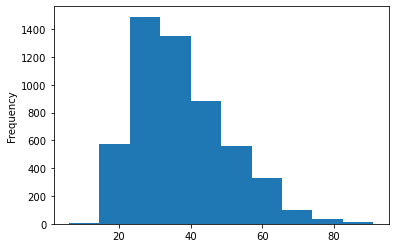

In [45]:
df['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

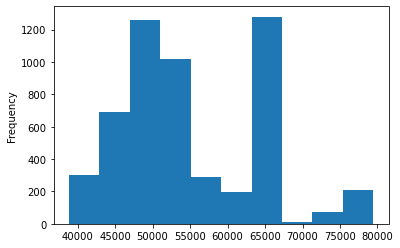

In [46]:
df['Income'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

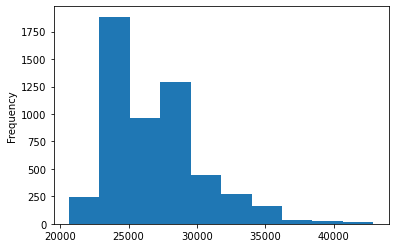

In [47]:
df['IncomePerCap'].plot.hist()

<AxesSubplot:>

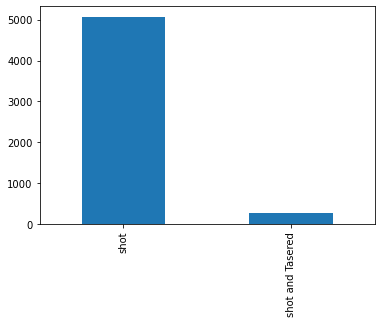

In [48]:
# 2) Plotting bar graphs of categorical data variables (excluding state, city, name and date)
df['manner_of_death'].value_counts().plot.bar()

<AxesSubplot:>

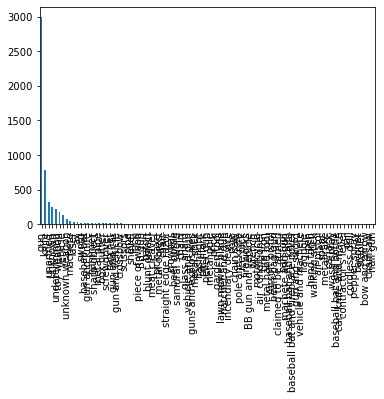

In [49]:
df['armed'].value_counts().plot.bar()

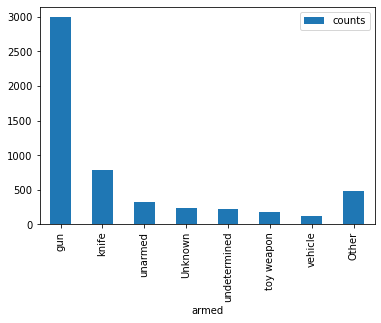

In [50]:
# Improving visualisation of the plot....
dfa = pd.DataFrame(df.armed)
cdfa = pd.DataFrame(df.armed.value_counts().reset_index().values, columns=['armed', 'counts'])
Other_total= cdfa.iloc[7:93].sum()
new_row = {'armed':'Other','counts': 480}
cdfa = cdfa.append(new_row, ignore_index=True).drop(cdfa.index[7:93])
cdfa.plot(kind='bar',x='armed',y='counts')
plt.show()

<AxesSubplot:>

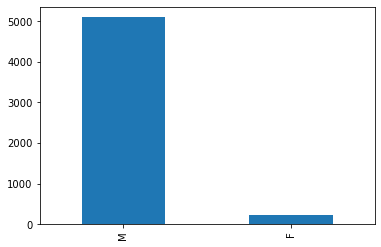

In [51]:
df['gender'].value_counts().plot.bar()

df['race'].value_counts().plot.bar()

<AxesSubplot:>

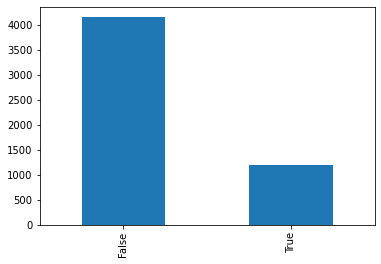

In [52]:
df['signs_of_mental_illness'].value_counts().plot.bar()

<AxesSubplot:>

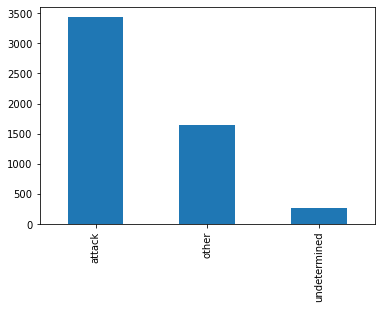

In [53]:
df['threat_level'].value_counts().plot.bar()

<AxesSubplot:>

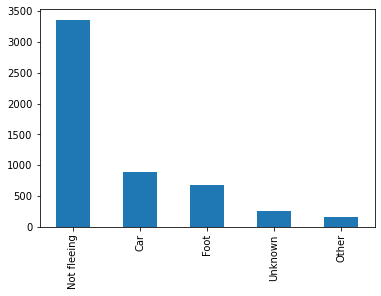

In [54]:
df['flee'].value_counts().plot.bar()

<AxesSubplot:>

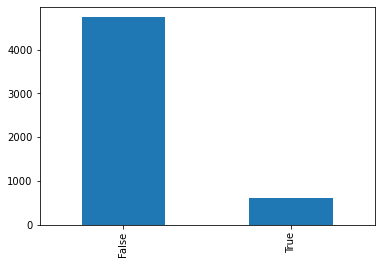

In [55]:
df['body_camera'].value_counts().plot.bar()

In [56]:
races = pd.DataFrame({'race': ['Hispanic', 'White', 'Black', 'Native', 'Asian']})

In [57]:
popu = ce['TotalPop'].sum()

In [58]:
races['Share Of Population'] = races['race'].apply(lambda x: ce.apply(lambda y: y[x]*y['TotalPop']/popu,axis=1).sum())
races['Percent Killed By Police'] = races['race'].apply(lambda x: len(df[df['race']==x])/len(df))*100

In [59]:
races

race  Share Of Population  Percent Killed By Police
0  Hispanic            17.604358                 16.448108
1     White            61.456573                 44.679655
2     Black            12.288051                 23.491945
3    Native             0.653657                  1.423754
4     Asian             5.292662                  1.704758

In [60]:
plotraces = races.melt(id_vars='race')

/Users/ecez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


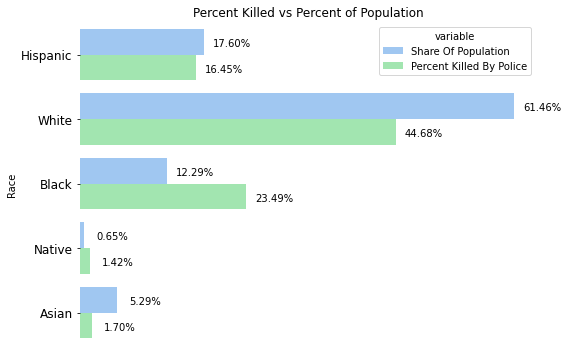

In [61]:
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(1,1,figsize = (8,5))
sns.barplot('value', 'race',hue='variable', data=plotraces, ax=ax )
for i in ax.patches:
    width = i.get_width()
    plt.text(4+i.get_width(), i.get_y()+0.55*i.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
ax.tick_params(axis='both', labelsize=12)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_title('Percent Killed vs Percent of Population')
ax.set_xlabel('')
ax.set_ylabel('Race')
ax.set_xticks([])
plt.tight_layout()
# divid epercvwnt killed by share oif piouylaiton 

In [62]:
# Black diff: 191%
# Native diff: 218%

In [63]:
df

id                     name        date   manner_of_death       armed  \
0        3               Tim Elliot  2015-01-02              shot         gun   
1      138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered     unarmed   
2      295       Jamison  Childress  2015-03-19              shot     unarmed   
3      393       Daniel Covarrubias  2015-04-21              shot     unarmed   
4      431               Roark Cook  2015-05-04              shot  toy weapon   
...    ...                      ...         ...               ...         ...   
5333  5081    Christopher G. Louras  2019-10-01              shot         gun   
5334  1405          Dominique Silva  2016-03-24              shot  toy weapon   
5335  1621          Edward Acquisto  2016-06-13              shot         gun   
5336  3119            Joseph Santos  2017-11-09              shot     Unknown   
5337  4023             DaShawn Cole  2018-09-07              shot         gun   

       age gender      race        city state  ...  WorkAtHome MeanCommute  \
0     53.0      M     Asian     Shelton    WA  ...    5.679548   27.051709   
1     35.0      M  Hispanic       Pasco    WA  ...    5.679548   27.051709   
2     20.0      M     White       Sumas    WA  ...    5.679548   27.051709   
3     37.0      M    Native    Lakewood    WA  ...    5.679548   27.051709   
4     36.0      M     White   Kennewick    WA  ...    5.679548   27.051709   
...    ...    ...       ...         ...   ...  ...         ...         ...   
5333  34.0      M     White     Rutland    VT  ...    6.822430   22.737637   
5334  24.0      M     Black   Pawtucket    RI  ...    3.838535   24.624145   
5335  80.0      M  Hispanic    Tiverton    RI  ...    3.838535   24.624145   
5336  32.0      M     White  Providence    RI  ...    3.838535   24.624145   
5337  28.0      M     Black   Pawtucket    RI  ...    3.838535   24.624145   

         Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0     2726.098361    77.577576   16.381240      5.864923    0.176045   
1     2726.098361    77.577576   16.381240      5.864923    0.176045   
2     2726.098361    77.577576   16.381240      5.864923    0.176045   
3     2726.098361    77.577576   16.381240      5.864923    0.176045   
4     2726.098361    77.577576   16.381240      5.864923    0.176045   
...           ...          ...         ...           ...         ...   
5333  2160.031279    76.739515   14.186594      8.828957    0.242800   
5334  2464.135794    82.860315   12.087171      4.969672    0.087352   
5335  2464.135794    82.860315   12.087171      4.969672    0.087352   
5336  2464.135794    82.860315   12.087171      4.969672    0.087352   
5337  2464.135794    82.860315   12.087171      4.969672    0.087352   

      Unemployment  violent crime rate  percent_killed_race  
0         6.170674          355.457957             1.704758  
1         6.170674          355.457957            16.448108  
2         6.170674          355.457957            44.679655  
3         6.170674          355.457957             1.423754  
4         6.170674          355.457957            44.679655  
...            ...                 ...                  ...  
5333      4.415706          207.264439            44.679655  
5334      6.968473          226.644718            23.491945  
5335      6.968473          226.644718            16.448108  
5336      6.968473          226.644718            44.679655  
5337      6.968473          226.644718            23.491945  

[5338 rows x 50 columns]

In [64]:
# Creating a year column in shootings database (main).
df.date = pd.to_datetime(df.date)
df['year'] = df['date'].apply(lambda x: x.year)

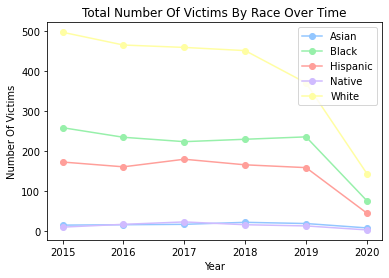

In [65]:
# Plotting number of victims by race over time
g = df[(df['race']!='Unknown') & (df['race']!='O')].pivot_table('id','year','race',aggfunc='count').plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number Of Victims')
t = plt.title('Total Number Of Victims By Race Over Time')
f = plt.legend()


In [66]:
# Grouping data by month....
by_month = df.groupby(pd.Grouper(key='date' ,freq='M')).count().reset_index()[['date', 'id']]
by_month['date_ordinal'] = by_month['date'].apply(lambda x: x.toordinal())


/Users/ecez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


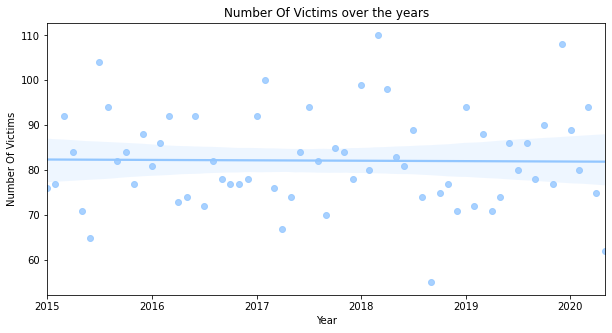

In [67]:
# Plotting this...
years = df.year.unique()
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.regplot(by_month['date_ordinal'], by_month['id'],ci=95, ax=ax)
labels = [by_month['date_ordinal'].min() + (x * 365) for x in range(6)]
ax.set_xticks(labels)
labels = ax.set_xticklabels(years)
ax.set_xlabel('Year')
l = ax.set_ylabel('Number Of Victims')
t = plt.title('Number Of Victims over the years')

In [68]:
###### Correlations ######

## Cramer's V Statistic for discrete data (categorical variables)
# Correlation between 'armed' & 'mental illness'?
# Displaying counts table...
countTable = pd.crosstab(df['armed'], df['signs_of_mental_illness'])
countTable

signs_of_mental_illness  False  True 
armed                                
Airsoft pistol               1      0
BB gun                       4      1
BB gun and vehicle           1      0
Taser                       22      4
Unknown                    218     22
...                        ...    ...
vehicle and gun              3      0
vehicle and machete          1      0
walking stick                0      1
wasp spray                   0      1
wrench                       0      1

[93 rows x 2 columns]

In [69]:
# Activate function for Cramer's V...
crosstab, res = researchpy.crosstab(df['armed'], df['signs_of_mental_illness'], test = "chi-square")
crosstab
res

Chi-square test   results
0  Pearson Chi-square ( 92.0) =   352.7630
1                     p-value =     0.0000
2                  Cramer's V =     0.2571

In [70]:
deg = min(countTable.shape[0], countTable.shape[1]) - 1

In [71]:
# Defining function to return nature of correlation in 4 measurements:
def int(V):
    if deg == 1:
        if V < 0.10:
            return 'negligible'
        elif V < 0.30:
            return 'small'
        elif V < 0.50:
            return 'medium'
        else:
            return 'large'
    elif deg == 2:
        if V < 0.07:
            return 'negligible'
        if V < 0.21:
            return 'small'
        if V < 0.35:
            return 'medium'
        else:
            return 'large'
    elif deg == 3:
        if V < 0.06:
            return 'negligible'
        elif V < 0.17:
            return 'small'
        elif V < 0.29:
            return 'medium'
        else:
            return 'large'

In [72]:
V = res.iloc[2,1]
print(V)
int(V)

0.2571


'small'

In [73]:
# Cramer's V for correlation between threat level + fleeing
crosstab, res = researchpy.crosstab(df['threat_level'], df['flee'], test = "chi-square")
crosstab
res

Chi-square test   results
0  Pearson Chi-square ( 8.0) =   148.7291
1                    p-value =     0.0000
2                 Cramer's V =     0.1180

In [74]:
V = res.iloc[2,1]
print(V)
int(V)

0.118


'small'

In [75]:
# Cramer's V...... race + armed
crosstab, res = researchpy.crosstab(df['armed'], df['race'], test = "chi-square")
crosstab
res

Chi-square test   results
0  Pearson Chi-square ( 552.0) =   911.3302
1                      p-value =     0.0000
2                   Cramer's V =     0.1687

In [76]:
V = res.iloc[2,1]
print(V)
int(V)

0.1687


'small'

In [77]:
# Cramer's V..... armed + age
crosstab, res = researchpy.crosstab(df['armed'], df['age'], test = "chi-square")
crosstab
res

Chi-square test    results
0  Pearson Chi-square ( 8832.0) =   5796.2199
1                       p-value =      1.0000
2                    Cramer's V =      0.1086

In [78]:
V = res.iloc[2,1]
print(V)
int(V)

0.1086


'small'

In [79]:
# Cramer's V..... age + race
crosstab, res = researchpy.crosstab(df['age'], df['race'], test = "chi-square")
crosstab
res

Chi-square test    results
0  Pearson Chi-square ( 576.0) =   1088.6141
1                      p-value =      0.0000
2                   Cramer's V =      0.1844

In [80]:
V = res.iloc[2,1]
print(V)
int(V)

0.1844


'small'

In [81]:
# Cramer's V..... manner of death + race
crosstab, res = researchpy.crosstab(df['manner_of_death'], df['race'], test = "chi-square")
crosstab
res

Chi-square test  results
0  Pearson Chi-square ( 6.0) =    8.7819
1                    p-value =    0.1862
2                 Cramer's V =    0.0406

In [82]:
V = res.iloc[2,1]
print(V)
int(V)

0.0406


'negligible'

In [83]:
# Cramer's V..... manner of death + state
crosstab, res = researchpy.crosstab(df['manner_of_death'], df['state'], test = "chi-square")
crosstab
res

Chi-square test  results
0  Pearson Chi-square ( 50.0) =   84.2990
1                     p-value =    0.0017
2                  Cramer's V =    0.1257

In [84]:
V = res.iloc[2,1]
print(V)
int(V)

0.1257


'small'

In [85]:
races['Share Of Population'] = races['race'].apply(lambda x: ce.apply(lambda y: y[x]*y['TotalPop']/popu,axis=1).sum())
races['Percent Killed By Police'] = races['race'].apply(lambda x: len(df[df['race']==x])/len(df))*100
races

race  Share Of Population  Percent Killed By Police
0  Hispanic            17.604358                 16.448108
1     White            61.456573                 44.679655
2     Black            12.288051                 23.491945
3    Native             0.653657                  1.423754
4     Asian             5.292662                  1.704758

In [86]:
df
# need for each state:
# for each race, percentage killed by police vs percentage share of population of state

id                     name       date   manner_of_death       armed  \
0        3               Tim Elliot 2015-01-02              shot         gun   
1      138  Antonio Zambrano-Montes 2015-02-10  shot and Tasered     unarmed   
2      295       Jamison  Childress 2015-03-19              shot     unarmed   
3      393       Daniel Covarrubias 2015-04-21              shot     unarmed   
4      431               Roark Cook 2015-05-04              shot  toy weapon   
...    ...                      ...        ...               ...         ...   
5333  5081    Christopher G. Louras 2019-10-01              shot         gun   
5334  1405          Dominique Silva 2016-03-24              shot  toy weapon   
5335  1621          Edward Acquisto 2016-06-13              shot         gun   
5336  3119            Joseph Santos 2017-11-09              shot     Unknown   
5337  4023             DaShawn Cole 2018-09-07              shot         gun   

       age gender      race        city state  ...  MeanCommute     Employed  \
0     53.0      M     Asian     Shelton    WA  ...    27.051709  2726.098361   
1     35.0      M  Hispanic       Pasco    WA  ...    27.051709  2726.098361   
2     20.0      M     White       Sumas    WA  ...    27.051709  2726.098361   
3     37.0      M    Native    Lakewood    WA  ...    27.051709  2726.098361   
4     36.0      M     White   Kennewick    WA  ...    27.051709  2726.098361   
...    ...    ...       ...         ...   ...  ...          ...          ...   
5333  34.0      M     White     Rutland    VT  ...    22.737637  2160.031279   
5334  24.0      M     Black   Pawtucket    RI  ...    24.624145  2464.135794   
5335  80.0      M  Hispanic    Tiverton    RI  ...    24.624145  2464.135794   
5336  32.0      M     White  Providence    RI  ...    24.624145  2464.135794   
5337  28.0      M     Black   Pawtucket    RI  ...    24.624145  2464.135794   

     PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
0      77.577576   16.381240      5.864923    0.176045      6.170674   
1      77.577576   16.381240      5.864923    0.176045      6.170674   
2      77.577576   16.381240      5.864923    0.176045      6.170674   
3      77.577576   16.381240      5.864923    0.176045      6.170674   
4      77.577576   16.381240      5.864923    0.176045      6.170674   
...          ...         ...           ...         ...           ...   
5333   76.739515   14.186594      8.828957    0.242800      4.415706   
5334   82.860315   12.087171      4.969672    0.087352      6.968473   
5335   82.860315   12.087171      4.969672    0.087352      6.968473   
5336   82.860315   12.087171      4.969672    0.087352      6.968473   
5337   82.860315   12.087171      4.969672    0.087352      6.968473   

      violent crime rate  percent_killed_race  year  
0             355.457957             1.704758  2015  
1             355.457957            16.448108  2015  
2             355.457957            44.679655  2015  
3             355.457957             1.423754  2015  
4             355.457957            44.679655  2015  
...                  ...                  ...   ...  
5333          207.264439            44.679655  2019  
5334          226.644718            23.491945  2016  
5335          226.644718            16.448108  2016  
5336          226.644718            44.679655  2017  
5337          226.644718            23.491945  2018  

[5338 rows x 51 columns]

In [87]:
ed2 = ed.groupby('state')['percent_completed_hs'].agg('mean').reset_index()

In [91]:
usrace = pd.DataFrame(df.groupby('race',as_index=False).size())
usrace = usrace.drop([4, 5])
usrace

race  size
0     Asian    91
1     Black  1254
2  Hispanic   878
3    Native    76
6     White  2385

In [92]:
blackt = pd.DataFrame(df['blacktf'])
blackt
df['blackint'] = df['blacktf']*1
df

KeyError: 'blacktf'

In [93]:
df['blackint']

KeyError: 'blackint'

In [89]:
pd.set_option('display.max_colwidth', None)
usblack = pd.DataFrame(df.groupby('state')['blackint'], index=None)
usblack = usblack.rename(columns={1:'Black', 0:'state'})

usblack

KeyError: 'Column not found: blackint'

In [90]:
usblack['Black'].dtype

NameError: name 'usblack' is not defined

In [91]:
usblack = pd.DataFrame(df.groupby('state')['race']=='Black')
usblack

ValueError: DataFrame constructor not properly called!

In [92]:
sdata1 = pd.DataFrame(df.groupby('state')['id'])
sdata1

0  \
0   AK   
1   AL   
2   AR   
3   AZ   
4   CA   
..  ..   
46  VT   
47  WA   
48  WI   
49  WV   
50  WY   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1  
0   4652     131
4653     836
4654     816
4655     953
4656    1166
4657    1255
4658    1305
4659    1590
4660    1707
4661    1829
4662    2042
4663    2363
4664    2459
4665    2618
4666    2680
4667    2998
4668    3141
4669    3226
4670    3265
4671    3494
4672    3537
4673    3538
4674    3819
4675    3973
4676    3974
4677    4201
4678    4465
4679    4546
4680    4618
4681    4656
4682    4795
4683    4988
4684    5313
4685    5357
4686    5431
4687    5502
4688    5536
4689    5623
4690    5661
Name: id, dtype: int64  
1                                                                                                                                                                                                                                                                                                                                                                  4809     142
4810     166
4811     255
4812     176
4813     307
        ... 
4906    5606
4907    5608
4908    5724
4909    5675
4910    5819
Name: id, Length: 102, dtype: int64  
2                                                                                                                                                                                                                                                                                                                                                                   2637      36
2638      38
2639     364
2640     464
2641     684
        ... 
2712    5527
2713    5605
2714    5689
2715    5780
2716    5817
Name: id, Length: 80, dtype: int64  
3                                                                                                                                                                                                                                                                                                                                                                  1422      13
1423      80
1424      85
1425     348
1426     349
        ... 
1668    5655
1669    5697
1670    5710
1671    5728
1672    5788
Name: id, Length: 251, dtype: int64  
4                                                                                                                                                                                                                                                                                                                                                                  286        8
287       19
288       43
289       63
290       68
        ... 
1065    5801
1066    5795
1067    5793
1068    5834
1069    5830
Name: id, Length: 784, dtype: int64  
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ...  
46                                                                                                                                  

In [93]:
####### Correlations between SEF #######

# Creating a dataframe containing each state's demographic and SEF.
sdata = df.groupby('state')['id'].count().reset_index()
sdata = sdata.merge(race_ratios,on='state').merge(pop,on='state').merge(sef,on='state').merge(ed2,on='state').merge(vcr,on='state')
sdata.rename(columns={'id':'Number Of Victims','IncomePerCap':'Income Per Capita'},inplace=True)
sdata['victims per 100k citizens']=sdata['Number Of Victims']/(sdata['TotalPop']/100000)

In [94]:
sdata

state  Number Of Victims      White      Black   Hispanic     Native  \
0     AK                 39  61.538304   3.056269   6.796547  13.768733   
1     AL                102  65.930038  26.408666   4.088196   0.465869   
2     AR                 80  73.013810  15.351735   7.161115   0.569548   
3     AZ                251  55.601463   4.054267  30.888347   3.915325   
4     CA                784  37.908368   5.544827  38.749987   0.353409   
..   ...                ...        ...        ...        ...        ...   
46    VT                  9  93.242448   1.205362   1.790847   0.294833   
47    WA                152  69.757044   3.508693  12.302123   1.113692   
48    WI                 90  81.814264   6.229054   6.604785   0.797653   
49    WV                 54  92.271502   3.509372   1.469558   0.172786   
50    WY                 14  84.302693   0.994211   9.713225   2.051373   

        Asian   Pacific  TotalPop       Men  ...  MeanCommute     Employed  \
0    6.057875  1.190426    738565    386319  ...    19.162686  2713.982869   
1    1.278853  0.029971   4850771   2350806  ...    24.703109  2296.709808   
2    1.406086  0.234395   2977944   1461651  ...    21.716259  2295.915283   
3    3.043925  0.176447   6809946   3385055  ...    25.221217  2326.211026   
4   13.923941  0.354567  38982847  19366579  ...    28.796720  2658.708856   
..        ...       ...       ...       ...  ...          ...          ...   
46   1.543221  0.025749    624636    308026  ...    22.737637  2160.031279   
47   7.998513  0.619826   7169967   3580888  ...    27.051709  2726.098361   
48   2.626177  0.026098   5763217   2864115  ...    22.070902  2509.755994   
49   0.754315  0.027344   1836843    907621  ...    26.030502  1869.168998   
50   0.841040  0.063058    583200    298301  ...    18.165146  2652.281883   

    PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
0     66.871808   26.721727      6.182757    0.221175      8.157018   
1     78.961780   15.647968      5.197778    0.189392      7.750819   
2     77.879048   15.765584      6.175886    0.181290      6.444187   
3     78.926897   14.513907      6.255523    0.163304      7.396296   
4     77.829875   13.766153      8.052346    0.175714      7.875660   
..          ...         ...           ...         ...           ...   
46    76.739515   14.186594      8.828957    0.242800      4.415706   
47    77.577576   16.381240      5.864923    0.176045      6.170674   
48    82.551024   12.106150      5.134206    0.190332      4.871548   
49    76.692261   18.773428      4.410600    0.125196      7.417794   
50    72.102862   21.227965      6.342461    0.320751      4.752278   

    percent_completed_hs  violent crime rate  victims per 100k citizens  
0              84.627381         1033.806729                   5.280510  
1              80.300685          644.224359                   2.102759  
2              79.949538          709.456982                   2.686417  
3              80.467117          489.153043                   3.685785  
4              81.955430          451.382145                   2.011141  
..                   ...                 ...                        ...  
46             89.976860          207.264439                   1.440839  
47             88.197577          355.457957                   2.119954  
48             90.263964          422.276324                   1.561628  
49             82.345050          578.115982                   2.939827  
50             92.100538          212.827338                   2.400549  

[51 rows x 39 columns]

In [95]:
sdata.columns

Index(['state', 'Number Of Victims', 'White', 'Black', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'TotalPop', 'Men', 'Women', 'Men_ratio',
       'Women_ratio', 'VotingAgeCitizen', 'Income', 'Income Per Capita',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
       'percent_completed_hs', 'violent crime rate',
       'victims per 100k citizens'],
      dtype='object')

In [96]:
# Displaying number of victims per state.
sfig = pgo.Figure(data = pgo.Choropleth(
     locations = sdata['state'],
     z = sdata['victims per 100k citizens'],
     locationmode = 'USA-states',
     colorscale = 'Blues',
     colorbar_title = 'Fatalities'
))

sfig.update_layout(
     title_text = 'Victims Per 100k Citizens By State',
     geo_scope = 'usa'
)

sfig.show()

In [97]:
sdata;

<AxesSubplot:>

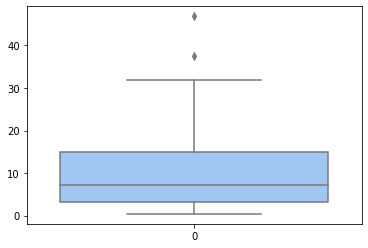

In [98]:
# Checking for outliers within 'black' and 'native'
sns.boxplot(data=sdata['Black'])

<AxesSubplot:>

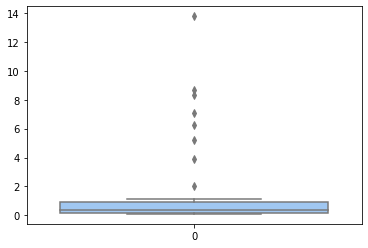

In [99]:
sns.boxplot(data=sdata['Native'])

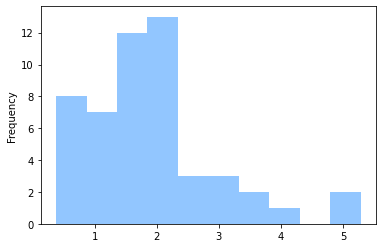

In [100]:
# Plotting histogram...
vhist = sdata['victims per 100k citizens'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

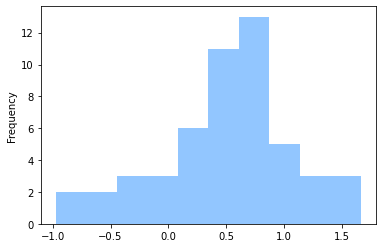

In [101]:
# Plotting log histogram of 'Victims Per 100k Citizens' to show distribution of data.
log_victims = np.log(sdata['victims per 100k citizens'])
log_victims.plot.hist()

In [102]:
# Checking to see if normal...
from scipy.stats import shapiro
stat, p = shapiro(log_victims)
print('stat=%.3f, p=%.3f\n' % (stat,p))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably Not Normal')

stat=0.974, p=0.327

Probably Normal


In [103]:
# Using a better method
from scipy.stats import jarque_bera
statistic, pval = jarque_bera(log_victims)
print('statistic=%.3f, p=%.3f\n' % (statistic,pval))
if pval > 0.05:
    print('Probably Normal')
else:
    print('Probably Not Normal')

statistic=1.652, p=0.438

Probably Normal


In [104]:
pd.set_option('display.max_rows',None)
sdata

state  Number Of Victims      White      Black   Hispanic     Native  \
0     AK                 39  61.538304   3.056269   6.796547  13.768733   
1     AL                102  65.930038  26.408666   4.088196   0.465869   
2     AR                 80  73.013810  15.351735   7.161115   0.569548   
3     AZ                251  55.601463   4.054267  30.888347   3.915325   
4     CA                784  37.908368   5.544827  38.749987   0.353409   
5     CO                191  68.645255   3.859768  21.286807   0.527569   
6     CT                 21  68.050884   9.761599  15.355457   0.143894   
7     DC                 13  35.977515  46.871738  10.678835   0.170615   
8     DE                 13  63.035839  21.348034   8.982424   0.305042   
9     FL                344  54.861259  15.432456  24.730171   0.205975   
10    GA                180  53.612976  30.882681   9.316169   0.178105   
11    HI                 30  22.232961   1.686334  10.226801   0.123966   
12    IA                 32  86.502794   3.340050   5.718628   0.276549   
13    ID                 41  82.547166   0.643937  12.184128   1.079830   
14    IL                103  61.888845  14.052926  16.819282   0.112600   
15    IN                 94  79.835078   9.134185   6.681800   0.183416   
16    KS                 48  76.461903   5.631447  11.532867   0.661738   
17    KY                 93  85.083658   7.876472   3.436150   0.182520   
18    LA                107  59.018725  31.951590   4.968154   0.531310   
19    MA                 35  72.944577   6.682304  11.195924   0.130044   
20    MD                 79  51.855156  29.255402   9.560345   0.193184   
21    ME                 22  93.591114   1.207279   1.535949   0.574700   
22    MI                 77  75.495825  13.694643   4.882390   0.445390   
23    MN                 61  80.762916   5.856263   5.185745   0.947444   
24    MO                139  79.815915  11.491996   4.023710   0.374685   
25    MS                 66  57.005102  37.452085   2.956695   0.420788   
26    MT                 30  86.612508   0.393005   3.554792   6.236176   
27    NC                155  63.639631  21.162047   9.099620   1.085022   
28    ND                 11  85.684718   2.284340   3.318247   5.186404   
29    NE                 24  79.836727   4.608181  10.470784   0.690973   
30    NH                 13  90.932714   1.211869   3.399118   0.141056   
31    NJ                 66  56.064440  12.680734  19.692353   0.103589   
32    NM                105  38.167618   1.791050  48.161686   8.700045   
33    NV                 94  50.464588   8.402483  28.199059   0.845558   
34    NY                 96  55.921786  14.359074  18.821910   0.230314   
35    OH                154  79.615593  12.133785   3.570244   0.146420   
36    OK                161  66.452427   7.157185  10.135273   7.099857   
37    OR                 86  76.518995   1.803443  12.658123   0.866670   
38    PA                107  77.253839  10.619452   6.839883   0.111548   
39    RI                  4  73.228353   5.476994  14.572885   0.370870   
40    SC                 86  63.751843  26.999676   5.464972   0.274786   
41    SD                 16  82.684191   1.672939   3.495865   8.313012   
42    TN                137  74.255593  16.659641   5.155614   0.228419   
43    TX                476  42.872912  11.666304  38.929127   0.239659   
44    UT                 58  79.000393   1.058141  13.669417   0.942849   
45    VA                 95  62.622905  18.838448   8.957538   0.209860   
46    VT                  9  93.242448   1.205362   1.790847   0.294833   
47    WA                152  69.757044   3.508693  12.302123   1.113692   
48    WI                 90  81.814264   6.229054   6.604785   0.797653   
49    WV                 54  92.271502   3.509372   1.469558   0.172786   
50    WY                 14  84.302693   0.994211   9.713225   2.051373   

        Asian   Pacific  TotalPop       Men  ...  MeanCommute     Employed  \
0    6.057875  1.190426 

In [105]:
print(sdata["Black"].mean())
print(sdata["Native"].median())

10.959890963353935
0.37468465754777547


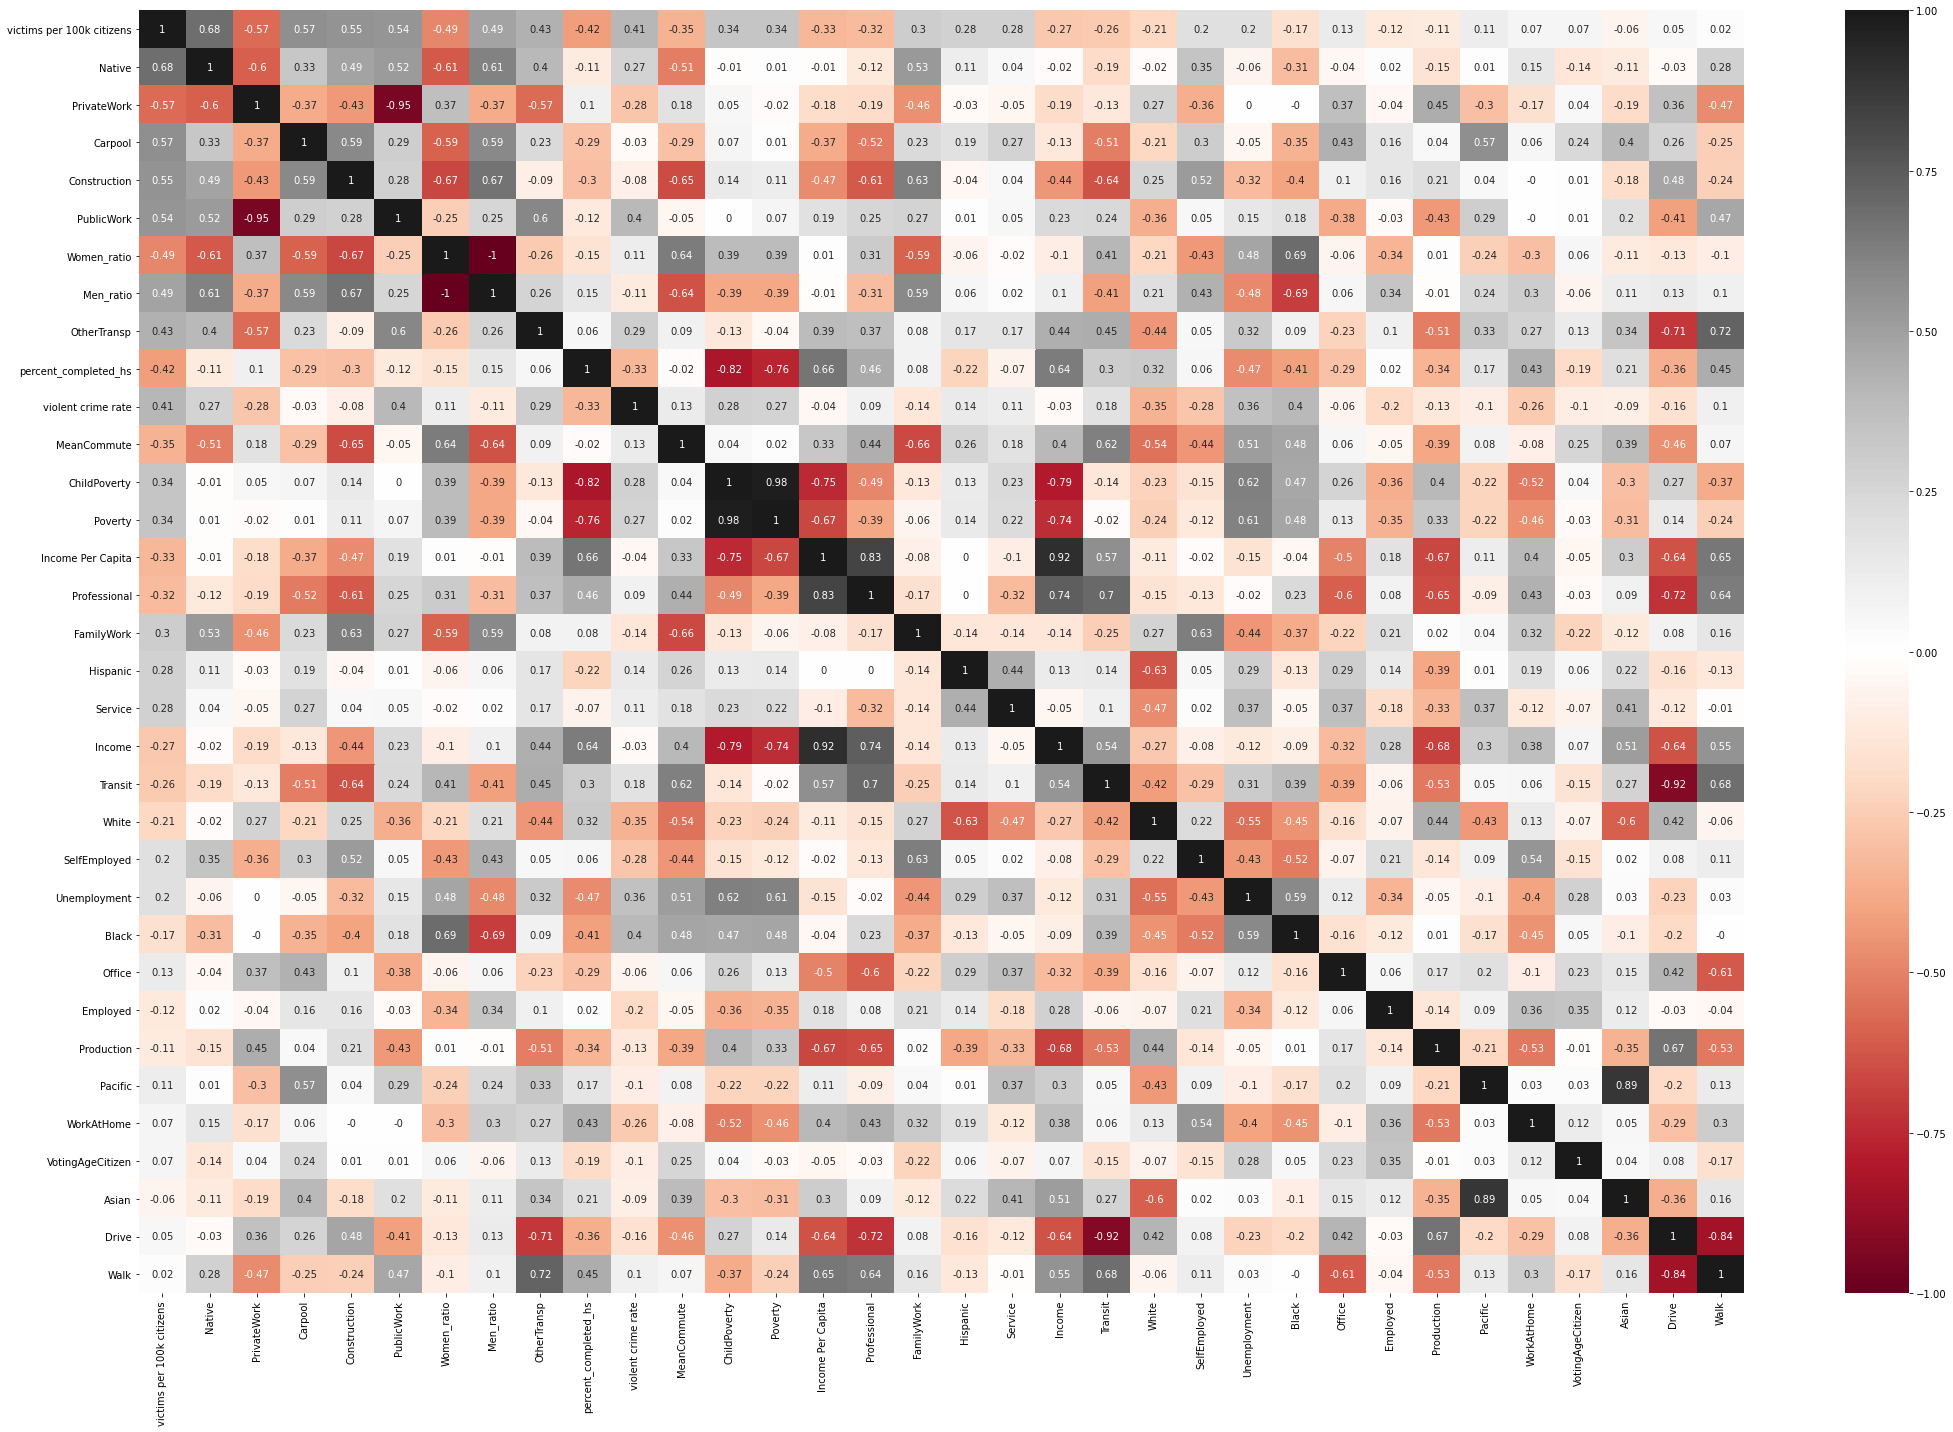

In [106]:
# Creating a heatmap to show correlations between socio-economic factors.
sdata_hm = sdata.drop(columns=['Men','Women','Number Of Victims','TotalPop'])
hcorrs = abs(sdata_hm.corr()).nlargest(40, 'victims per 100k citizens').index
plt.figure(figsize = (30,20))
plt.rcParams["figure.figsize"] = (40,30)
crmap = np.round(sdata_hm[hcorrs].corr(method='pearson'),2)
htmap = sns.heatmap(crmap, cbar=True, annot=True, cmap = 'RdGy', yticklabels = hcorrs.values, xticklabels = hcorrs.values)
plt.tight_layout()

In [107]:
####### Modelling #######
### K-Means

In [108]:
sdata.columns

Index(['state', 'Number Of Victims', 'White', 'Black', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'TotalPop', 'Men', 'Women', 'Men_ratio',
       'Women_ratio', 'VotingAgeCitizen', 'Income', 'Income Per Capita',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
       'percent_completed_hs', 'violent crime rate',
       'victims per 100k citizens'],
      dtype='object')

In [109]:
from sklearn.cluster import KMeans
sdata.columns;

In [110]:
# Dropping unwanted features within the data
newdata = sdata.drop(columns=['state','Number Of Victims','TotalPop'])
newdata

White      Black   Hispanic     Native      Asian   Pacific       Men  \
0   61.538304   3.056269   6.796547  13.768733   6.057875  1.190426    386319   
1   65.930038  26.408666   4.088196   0.465869   1.278853  0.029971   2350806   
2   73.013810  15.351735   7.161115   0.569548   1.406086  0.234395   1461651   
3   55.601463   4.054267  30.888347   3.915325   3.043925  0.176447   3385055   
4   37.908368   5.544827  38.749987   0.353409  13.923941  0.354567  19366579   
5   68.645255   3.859768  21.286807   0.527569   2.975914  0.137135   2731315   
6   68.050884   9.761599  15.355457   0.143894   4.310934  0.018392   1754046   
7   35.977515  46.871738  10.678835   0.170615   3.729247  0.036714    319046   
8   63.035839  21.348034   8.982424   0.305042   3.823475  0.021538    456876   
9   54.861259  15.432456  24.730171   0.205975   2.631350  0.050369   9914361   
10  53.612976  30.882681   9.316169   0.178105   3.789821  0.045147   4968887   
11  22.232961   1.686334  10.226801   0.123966  37.013949  9.242538    713981   
12  86.502794   3.340050   5.718628   0.276549   2.270211  0.086462   1548035   
13  82.547166   0.643937  12.184128   1.079830   1.323116  0.120176    830627   
14  61.888845  14.052926  16.819282   0.112600   5.187871  0.023228   6312600   
15  79.835078   9.134185   6.681800   0.183416   2.065523  0.029809   3258279   
16  76.461903   5.631447  11.532867   0.661738   2.761273  0.057852   1445980   
17  85.083658   7.876472   3.436150   0.182520   1.339259  0.046100   2179025   
18  59.018725  31.951590   4.968154   0.531310   1.727202  0.025043   2281239   
19  72.944577   6.682304  11.195924   0.130044   6.248457  0.024847   3293426   
20  51.855156  29.255402   9.560345   0.193184   6.182156  0.041121   2906277   
21  93.591114   1.207279   1.535949   0.574700   1.100796  0.017716    651040   
22  75.495825  13.694643   4.882390   0.445390   2.899703  0.023764   4880579   
23  80.762916   5.856263   5.185745   0.947444   4.635484  0.029472   2731831   
24  79.815915  11.491996   4.023710   0.374685   1.839582  0.094778   2981332   
25  57.005102  37.452085   2.956695   0.420788   0.962939  0.019048   1448717   
26  86.612508   0.393005   3.554792   6.236176   0.706426  0.052090    517860   
27  63.639631  21.162047   9.099620   1.085022   2.656300  0.051565   4895368   
28  85.684718   2.284340   3.318247   5.186404   1.348283  0.041614    382121   
29  79.836727   4.608181  10.470784   0.690973   2.213933  0.071528    943547   
30  90.932714   1.211869   3.399118   0.141056   2.479362  0.018042    659131   
31  56.064440  12.680734  19.692353   0.103589   9.361224  0.023503   4372321   
32  38.167618   1.791050  48.161686   8.700045   1.342360  0.044750   1032086   
33  50.464588   8.402483  28.199059   0.845558   7.902855  0.607428   1450091   
34  55.921786  14.359074  18.821910   0.230314   8.280326  0.028653   9604111   
35  79.615593  12.133785   3.570244   0.146420   2.018063  0.026450   5686081   
36  66.452427   7.157185  10.135273   7.099857   2.036460  0.132815   1930615   
37  76.518995   1.803443  12.658123   0.866670   4.087103  0.360630   1993822   
38  77.253839  10.619452   6.839883   0.111548   3.240199  0.017514   6260160   
39  73.228353   5.476994  14.572885   0.370870   3.315438  0.066162    512581   
40  63.751843  26.999676   5.464972   0.274786   1.455003  0.056609   2376759   
41  82.684191   1.672939   3.495865   8.313012   1.357781  0.038919    430587   
42  74.255593  16.659641   5.155614   0.228419   1.665495  0.050997   3217073   
43  42.872912  11.666304  38.929127   0.239659   4.460341  0.073394  13616977   
44  79.000393   1.058141  13.669417   0.942849   2.223529  0.876637   1506614   
45  62.622905  18.838448   8.957538   0.209860   6.168970  0.055345   4113988   
46  93.242448   1.205362   1.790847   0.294833   1.543221  0.025749    308026   
47  69.757044   3.508693  12.302123   1.113692   7.998513  0.619826   3580888   
48  81.814264   6.229054   6.604785   0

In [111]:
# Isolating the features columns.
features = list(newdata.columns)

In [112]:
# Obtaining the features data.
featuresdata = newdata[features]
featuresdata

White      Black   Hispanic     Native      Asian   Pacific       Men  \
0   61.538304   3.056269   6.796547  13.768733   6.057875  1.190426    386319   
1   65.930038  26.408666   4.088196   0.465869   1.278853  0.029971   2350806   
2   73.013810  15.351735   7.161115   0.569548   1.406086  0.234395   1461651   
3   55.601463   4.054267  30.888347   3.915325   3.043925  0.176447   3385055   
4   37.908368   5.544827  38.749987   0.353409  13.923941  0.354567  19366579   
5   68.645255   3.859768  21.286807   0.527569   2.975914  0.137135   2731315   
6   68.050884   9.761599  15.355457   0.143894   4.310934  0.018392   1754046   
7   35.977515  46.871738  10.678835   0.170615   3.729247  0.036714    319046   
8   63.035839  21.348034   8.982424   0.305042   3.823475  0.021538    456876   
9   54.861259  15.432456  24.730171   0.205975   2.631350  0.050369   9914361   
10  53.612976  30.882681   9.316169   0.178105   3.789821  0.045147   4968887   
11  22.232961   1.686334  10.226801   0.123966  37.013949  9.242538    713981   
12  86.502794   3.340050   5.718628   0.276549   2.270211  0.086462   1548035   
13  82.547166   0.643937  12.184128   1.079830   1.323116  0.120176    830627   
14  61.888845  14.052926  16.819282   0.112600   5.187871  0.023228   6312600   
15  79.835078   9.134185   6.681800   0.183416   2.065523  0.029809   3258279   
16  76.461903   5.631447  11.532867   0.661738   2.761273  0.057852   1445980   
17  85.083658   7.876472   3.436150   0.182520   1.339259  0.046100   2179025   
18  59.018725  31.951590   4.968154   0.531310   1.727202  0.025043   2281239   
19  72.944577   6.682304  11.195924   0.130044   6.248457  0.024847   3293426   
20  51.855156  29.255402   9.560345   0.193184   6.182156  0.041121   2906277   
21  93.591114   1.207279   1.535949   0.574700   1.100796  0.017716    651040   
22  75.495825  13.694643   4.882390   0.445390   2.899703  0.023764   4880579   
23  80.762916   5.856263   5.185745   0.947444   4.635484  0.029472   2731831   
24  79.815915  11.491996   4.023710   0.374685   1.839582  0.094778   2981332   
25  57.005102  37.452085   2.956695   0.420788   0.962939  0.019048   1448717   
26  86.612508   0.393005   3.554792   6.236176   0.706426  0.052090    517860   
27  63.639631  21.162047   9.099620   1.085022   2.656300  0.051565   4895368   
28  85.684718   2.284340   3.318247   5.186404   1.348283  0.041614    382121   
29  79.836727   4.608181  10.470784   0.690973   2.213933  0.071528    943547   
30  90.932714   1.211869   3.399118   0.141056   2.479362  0.018042    659131   
31  56.064440  12.680734  19.692353   0.103589   9.361224  0.023503   4372321   
32  38.167618   1.791050  48.161686   8.700045   1.342360  0.044750   1032086   
33  50.464588   8.402483  28.199059   0.845558   7.902855  0.607428   1450091   
34  55.921786  14.359074  18.821910   0.230314   8.280326  0.028653   9604111   
35  79.615593  12.133785   3.570244   0.146420   2.018063  0.026450   5686081   
36  66.452427   7.157185  10.135273   7.099857   2.036460  0.132815   1930615   
37  76.518995   1.803443  12.658123   0.866670   4.087103  0.360630   1993822   
38  77.253839  10.619452   6.839883   0.111548   3.240199  0.017514   6260160   
39  73.228353   5.476994  14.572885   0.370870   3.315438  0.066162    512581   
40  63.751843  26.999676   5.464972   0.274786   1.455003  0.056609   2376759   
41  82.684191   1.672939   3.495865   8.313012   1.357781  0.038919    430587   
42  74.255593  16.659641   5.155614   0.228419   1.665495  0.050997   3217073   
43  42.872912  11.666304  38.929127   0.239659   4.460341  0.073394  13616977   
44  79.000393   1.058141  13.669417   0.942849   2.223529  0.876637   1506614   
45  62.622905  18.838448   8.957538   0.209860   6.168970  0.055345   4113988   
46  93.242448   1.205362   1.790847   0.294833   1.543221  0.025749    308026   
47  69.757044   3.508693  12.302123   1.113692   7.998513  0.619826   3580888   
48  81.814264   6.229054   6.604785   0

In [113]:
from sklearn.decomposition import PCA

In [114]:
## Implementing a K-Means clustering pipeline (using MinMaxScaler when we cannot assume that feature shapes
## follow a normal distribution).

from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

preprocessor = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=2, random_state=None)),
    ]
)

In [115]:
# Building the K-Means pipeline with user-defined arguments.
clusterer = Pipeline(
[
    ('kmeans',
     KMeans(
     n_clusters=3,
     init='k-means++',     # k-means ++ ensures centroids initialized with some distance betweem them.
     n_init=10,
     max_iter=300,
     random_state=None,),)

])


In [116]:
# Extending the pipeline...
pipe = Pipeline(
[
    ('preprocessor', preprocessor),
    ('clusterer', clusterer)
])

In [117]:
# Applying the pipeline to the scaled_features data
pipe.fit(featuresdata)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans', KMeans(n_clusters=3))]))])

In [118]:
# Evaluating performance by calculating the silhouette coefficient.
preprocessed_data = pipe['preprocessor'].transform(featuresdata)
predicted_labels = pipe['clusterer']['kmeans'].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.4928080422634255

In [119]:
## Silhouette 2

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [120]:
print(__doc__)

Automatically created module for IPython interactive environment


In [121]:
range_n_clusters = [2,3,4,5,6]

For n_clusters =  2 The average silhouette_score is:  0.4046758750298642
size of cluster i =  24
size of cluster i =  27
For n_clusters =  3 The average silhouette_score is:  0.4928080422634255
size of cluster i =  19
size of cluster i =  20
size of cluster i =  12
For n_clusters =  4 The average silhouette_score is:  0.4750616081426001
size of cluster i =  17
size of cluster i =  20
size of cluster i =  1
size of cluster i =  13
For n_clusters =  5 The average silhouette_score is:  0.4416900820616689
size of cluster i =  12
size of cluster i =  20
size of cluster i =  12
size of cluster i =  1
size of cluster i =  6
For n_clusters =  6 The average silhouette_score is:  0.3738776206451158
size of cluster i =  7
size of cluster i =  16
size of cluster i =  12
size of cluster i =  6
size of cluster i =  9
size of cluster i =  1


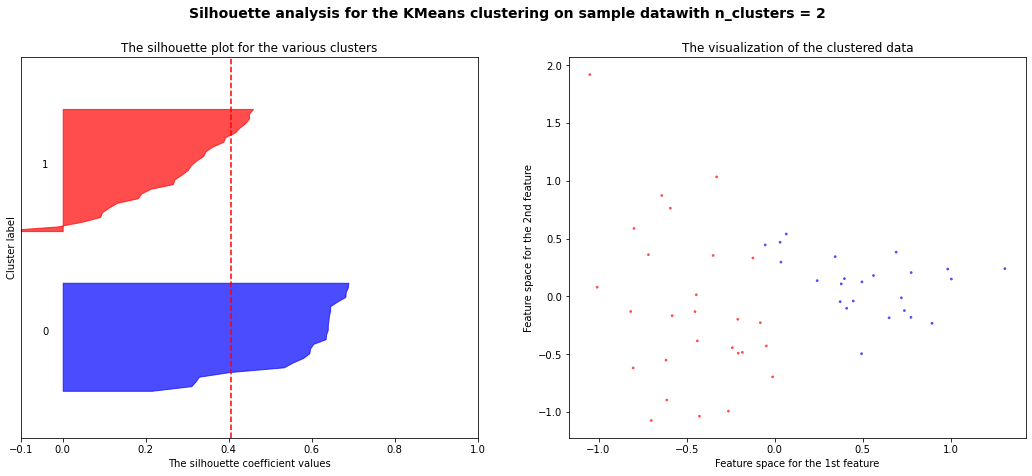

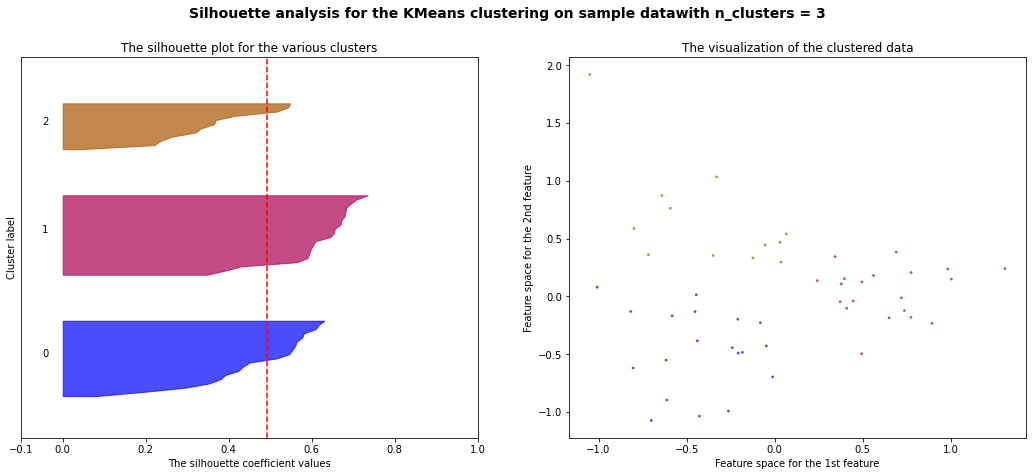

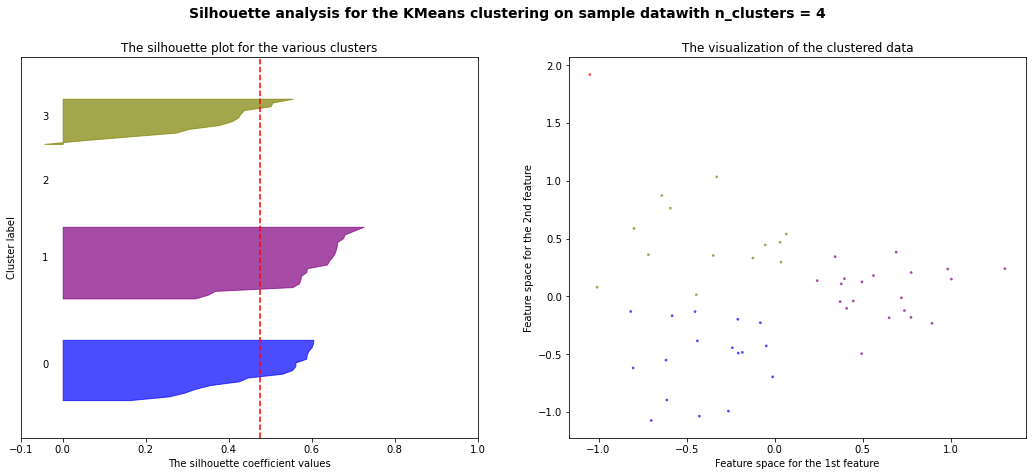

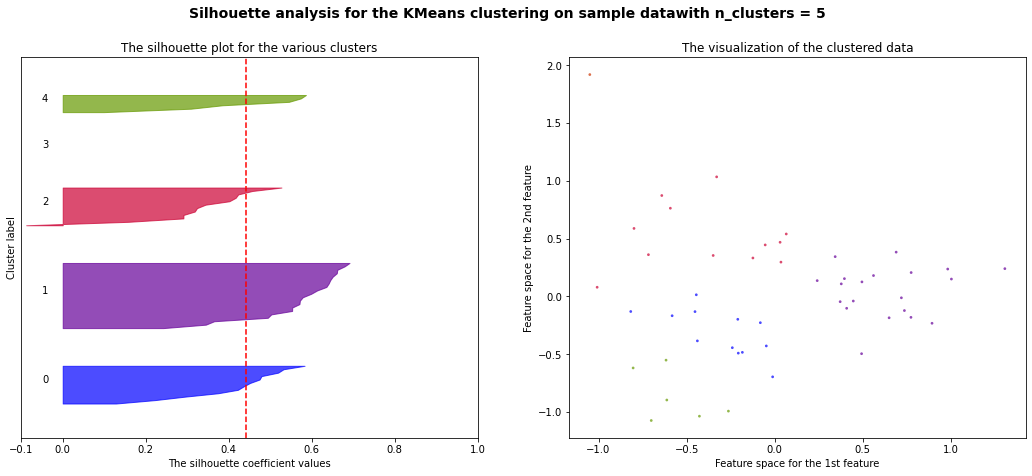

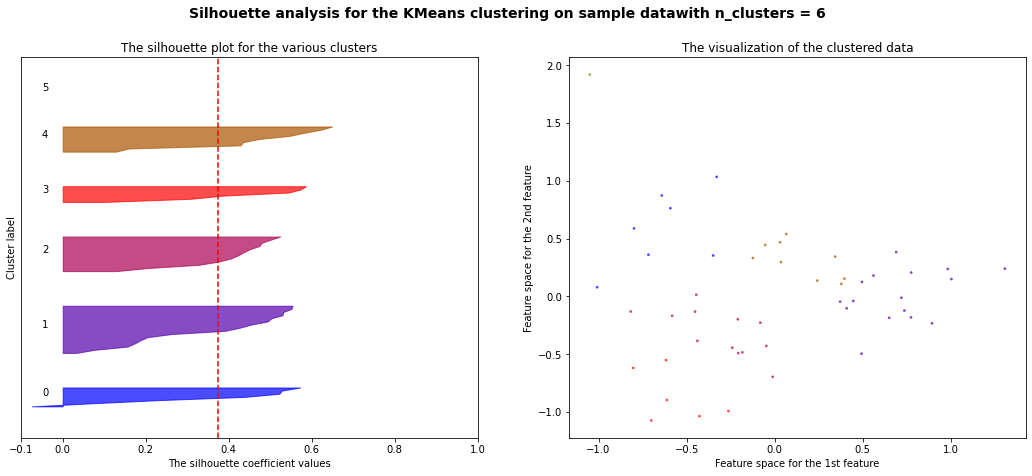

In [122]:
for n_clusters in range_n_clusters:
    
    # Creating a subplot with 1 row, 2 columns.
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # 1st subplot = silhouette plot 
    # Silhouette coefficient ranging from -0.1 to 1.
    ax1.set_xlim([-0.1,1])
    
    # (n_clusters+1)*10 for inserting space between silhouette plots of each of the clusters.
    ax1.set_ylim([0, len(preprocessed_data) + (n_clusters+1)*10])
    
    # Initialize the cluster with n_clusters value and a random generator seed of 'None'.
    clusterer = KMeans(n_clusters=n_clusters,random_state=None)
    cluster_labels = clusterer.fit_predict(preprocessed_data)
    
    # Silhouette score gives average value for all samples.
    # Provides a perspective into density and separation of the formed clusters.
    silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
    print("For n_clusters = ", n_clusters,
         "The average silhouette_score is: ", silhouette_avg)
    
    # Compute silhouette scores for each sample.
    sample_silhouette_values = silhouette_samples(preprocessed_data, cluster_labels)
    
    
    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them.
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        print("size of cluster i = ", size_cluster_i)
        
        color = cm.brg(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle,
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for the next plot.
        y_lower = y_upper + 10      # 10 for the 0 samples.
        
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
        
    # The vertical line for the av. silhouette score of all the values.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
    ax1.set_yticks([])     # Clearing the y_axis labels / ticks.
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
        
    # 2nd plot showing actual clusters formed.
    colors = cm.brg(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(preprocessed_data[:,0],preprocessed_data[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')
    
    if range(0,3) == range(n_clusters):
        clu_dataframe = pd.DataFrame(data=(cluster_labels.astype(float) / n_clusters))
        clu_dataframe.columns=['cluster_labels']
        data_w_k3 = featuresdata.join(clu_dataframe)
        data_w_k3
        
    if range(0,4) == range(n_clusters):
        clu_dataframe_2 = pd.DataFrame(data=(cluster_labels.astype(float) / n_clusters))
        clu_dataframe_2.columns=['cluster_labels']
        data_w_k4 = featuresdata.join(clu_dataframe_2)
        data_w_k4
    

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
        
    plt.suptitle(("Silhouette analysis for the KMeans clustering on sample data"
                     "with n_clusters = %d" %n_clusters), fontsize=14,fontweight='bold')
        
plt.show()

In [123]:
## Interpretation of results from silhouette analysis:
# If there is a presence of clusters with below average silhouette scores, or wide fluctuation in size of 
# silhouette plots.

# Plot shows no below average silhouette scores.
# Tend to be wider fluctuations in size of silhouettes as n_clusters decrease.
# Av. silhouette score shows quality of clustering;
# higher score to 1 = better.
# Optimal: n = 3 clusters (ss = 0.4951...) 
# Worst: n = 4 clusters (ss = 0.4443...) + wide fluctuation in size of the two silhouettes.

# 2 cluster solutions identified: k = 3, 4

In [124]:

data_w_k3

White      Black   Hispanic     Native      Asian   Pacific       Men  \
0   61.538304   3.056269   6.796547  13.768733   6.057875  1.190426    386319   
1   65.930038  26.408666   4.088196   0.465869   1.278853  0.029971   2350806   
2   73.013810  15.351735   7.161115   0.569548   1.406086  0.234395   1461651   
3   55.601463   4.054267  30.888347   3.915325   3.043925  0.176447   3385055   
4   37.908368   5.544827  38.749987   0.353409  13.923941  0.354567  19366579   
5   68.645255   3.859768  21.286807   0.527569   2.975914  0.137135   2731315   
6   68.050884   9.761599  15.355457   0.143894   4.310934  0.018392   1754046   
7   35.977515  46.871738  10.678835   0.170615   3.729247  0.036714    319046   
8   63.035839  21.348034   8.982424   0.305042   3.823475  0.021538    456876   
9   54.861259  15.432456  24.730171   0.205975   2.631350  0.050369   9914361   
10  53.612976  30.882681   9.316169   0.178105   3.789821  0.045147   4968887   
11  22.232961   1.686334  10.226801   0.123966  37.013949  9.242538    713981   
12  86.502794   3.340050   5.718628   0.276549   2.270211  0.086462   1548035   
13  82.547166   0.643937  12.184128   1.079830   1.323116  0.120176    830627   
14  61.888845  14.052926  16.819282   0.112600   5.187871  0.023228   6312600   
15  79.835078   9.134185   6.681800   0.183416   2.065523  0.029809   3258279   
16  76.461903   5.631447  11.532867   0.661738   2.761273  0.057852   1445980   
17  85.083658   7.876472   3.436150   0.182520   1.339259  0.046100   2179025   
18  59.018725  31.951590   4.968154   0.531310   1.727202  0.025043   2281239   
19  72.944577   6.682304  11.195924   0.130044   6.248457  0.024847   3293426   
20  51.855156  29.255402   9.560345   0.193184   6.182156  0.041121   2906277   
21  93.591114   1.207279   1.535949   0.574700   1.100796  0.017716    651040   
22  75.495825  13.694643   4.882390   0.445390   2.899703  0.023764   4880579   
23  80.762916   5.856263   5.185745   0.947444   4.635484  0.029472   2731831   
24  79.815915  11.491996   4.023710   0.374685   1.839582  0.094778   2981332   
25  57.005102  37.452085   2.956695   0.420788   0.962939  0.019048   1448717   
26  86.612508   0.393005   3.554792   6.236176   0.706426  0.052090    517860   
27  63.639631  21.162047   9.099620   1.085022   2.656300  0.051565   4895368   
28  85.684718   2.284340   3.318247   5.186404   1.348283  0.041614    382121   
29  79.836727   4.608181  10.470784   0.690973   2.213933  0.071528    943547   
30  90.932714   1.211869   3.399118   0.141056   2.479362  0.018042    659131   
31  56.064440  12.680734  19.692353   0.103589   9.361224  0.023503   4372321   
32  38.167618   1.791050  48.161686   8.700045   1.342360  0.044750   1032086   
33  50.464588   8.402483  28.199059   0.845558   7.902855  0.607428   1450091   
34  55.921786  14.359074  18.821910   0.230314   8.280326  0.028653   9604111   
35  79.615593  12.133785   3.570244   0.146420   2.018063  0.026450   5686081   
36  66.452427   7.157185  10.135273   7.099857   2.036460  0.132815   1930615   
37  76.518995   1.803443  12.658123   0.866670   4.087103  0.360630   1993822   
38  77.253839  10.619452   6.839883   0.111548   3.240199  0.017514   6260160   
39  73.228353   5.476994  14.572885   0.370870   3.315438  0.066162    512581   
40  63.751843  26.999676   5.464972   0.274786   1.455003  0.056609   2376759   
41  82.684191   1.672939   3.495865   8.313012   1.357781  0.038919    430587   
42  74.255593  16.659641   5.155614   0.228419   1.665495  0.050997   3217073   
43  42.872912  11.666304  38.929127   0.239659   4.460341  0.073394  13616977   
44  79.000393   1.058141  13.669417   0.942849   2.223529  0.876637   1506614   
45  62.622905  18.838448   8.957538   0.209860   6.168970  0.055345   4113988   
46  93.242448   1.205362   1.790847   0.294833   1.543221  0.025749    308026   
47  69.757044   3.508693  12.302123   1.113692   7.998513  0.619826   3580888   
48  81.814264   6.229054   6.604785   0

In [125]:
sa = list(data_w_k3.columns.values)
sa

['White',
 'Black',
 'Hispanic',
 'Native',
 'Asian',
 'Pacific',
 'Men',
 'Women',
 'Men_ratio',
 'Women_ratio',
 'VotingAgeCitizen',
 'Income',
 'Income Per Capita',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment',
 'percent_completed_hs',
 'violent crime rate',
 'victims per 100k citizens',
 'cluster_labels']

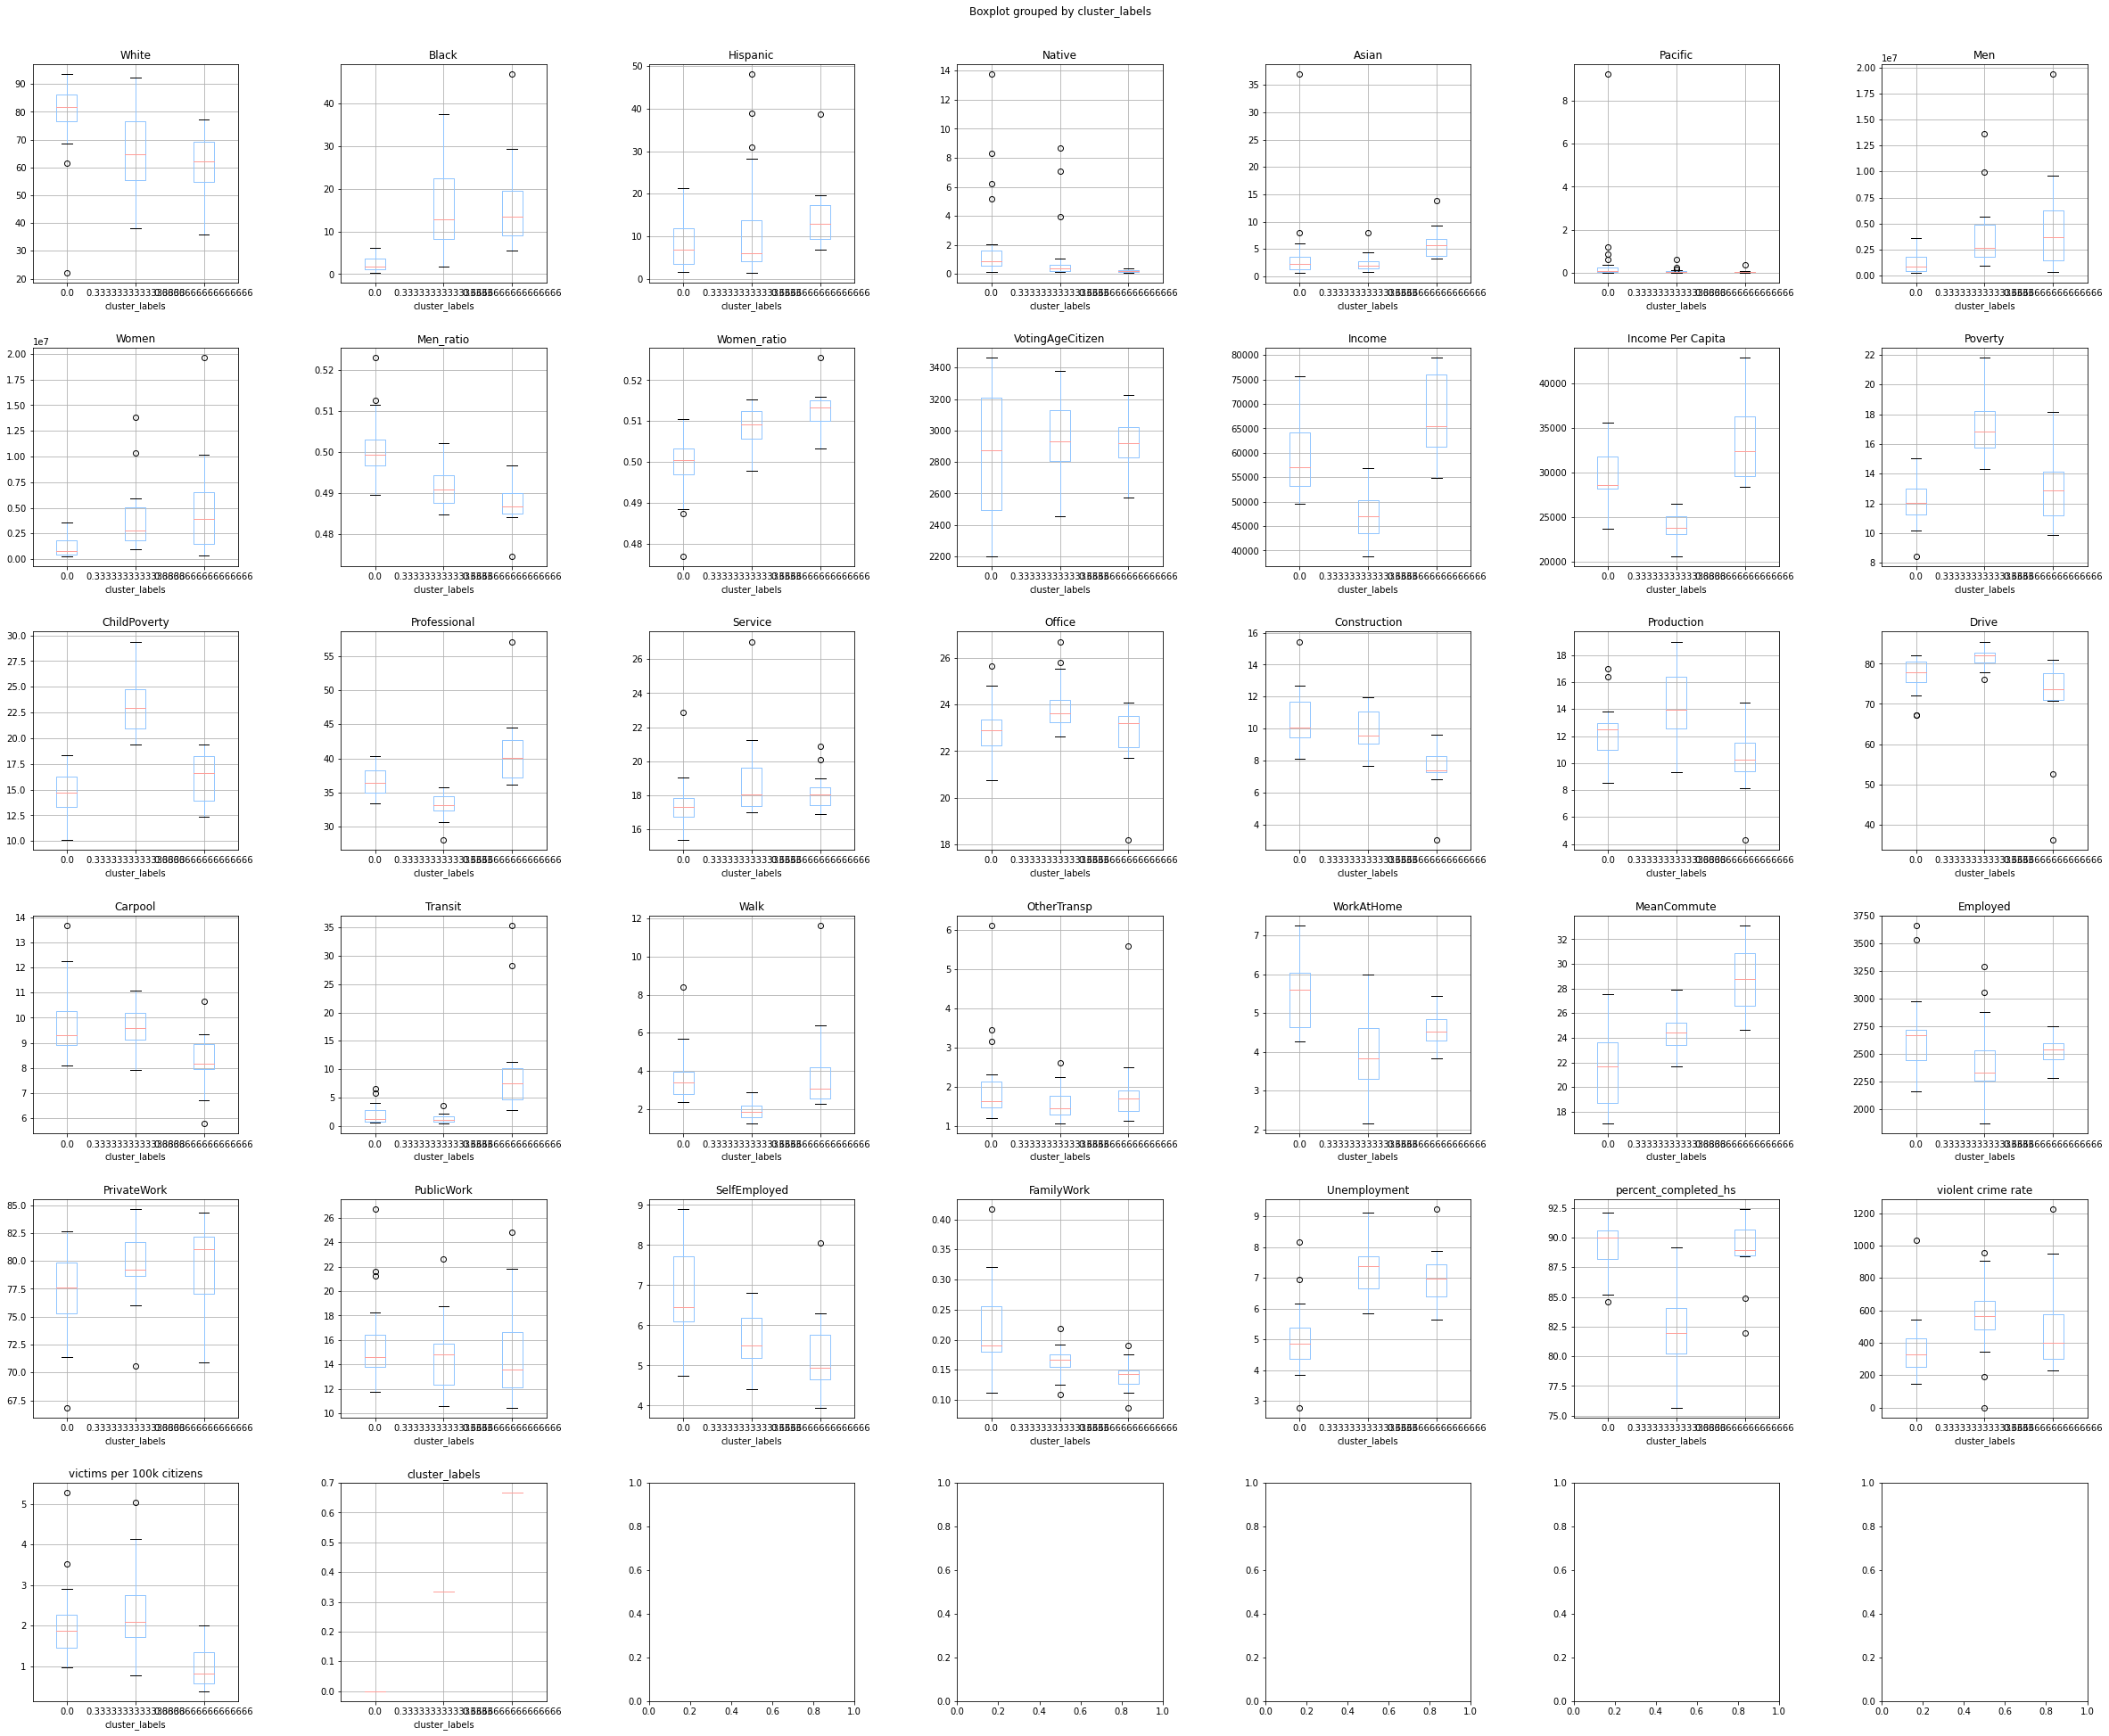

In [126]:
## k = 3, boxplots
import matplotlib.pyplot as plt

fig,axes = plt.subplots(6,7)
plt.rcParams["figure.figsize"] = (40,40)

for i,el in enumerate(list(data_w_k4.columns.values)[:]):
    a = data_w_k3.boxplot(el, by="cluster_labels", ax = axes.flatten()[i])

plt.subplots_adjust(bottom=0.1,right=0.9,top=0.95,hspace=0.3,wspace=0.5)
plt.show()